In [56]:
pip install igraph


     ---------------------------------------- 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install louvain


  Using cached louvain-0.7.1-cp39-cp39-win_amd64.whl (94 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-04-25 10:40.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [3]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [4]:
import scanpy.external as sce

# Integrated immune cells

In [5]:
# all immune cells

adata_immn = sc.read('Group_ABC_after_celltype_clustering_Myel_Tcell_group_added.h5ad')

In [6]:
adata_immn.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGTAGCCGA-1-0-0    3934.0               3879   1452.073242   
AAACCTGCAAGAGGCT-1-0-0     674.0                669    882.995728   
AAACCTGCAGTATCTG-1-0-0    1014.0               1003    956.411804   
AAACCTGCATGCCTTC-1-0-0    2607.0               2556   1262.646240   
AAACCTGGTGCCTGGT-1-0-0     896.0                885   1091.559448   
...                          ...                ...           ...   
TTTGGTTCAAGCCATT-1-24-2   4456.0               4328   1867.209229   
TTTGGTTGTCACCCAG-1-24-2    689.0                642    487.017822   
TTTGTCAAGCGCTTAT-1-24-2    248.0                235    523.794067   
TTTGTCAGTCCTCTTG-1-24-2   2711.0               2644   1972.602417   
TTTGTCAGTCTCTTTA-1-24-2   1890.0               1858   1673.672119   

                         total_counts_mt  pct_counts_mt tissue patient leiden  \
AAACCTGAGTAGCCGA-1-0-0         18.802568       1.294877  tumor    P686      6   
AAACCTGCAAGAGGCT-1-0-0         11.229170       1.271713  tumor    P686      6   
AAACCTGCAGTATCTG-1-0-0         18.788149       1.964441  tumor    P686      6   
AAACCTGCATGCCTTC-1-0-0         23.060396       1.826355  tumor    P686     14   
AAACCTGGTGCCTGGT-1-0-0         17.238060       1.579214  tumor    P686      6   
...                                  ...            ...    ...     ...    ...   
TTTGGTTCAAGCCATT-1-24-2        29.546848       1.582407  tumor    P001      0   
TTTGGTTGTCACCCAG-1-24-2        17.679008       3.630054  tumor    P001      5   
TTTGTCAAGCGCTTAT-1-24-2         8.050291       1.536919  tumor    P001      5   
TTTGTCAGTCCTCTTG-1-24-2        24.433256       1.238631  tumor    P001     10   
TTTGTCAGTCTCTTTA-1-24-2         7.590561       0.453527  tumor    P001      4   

                        batch  total_counts_ribo  ...  percent_mt2  \
AAACCTGAGTAGCCGA-1-0-0      0         198.197769  ...     0.012949   
AAACCTGCAAGAGGCT-1-0-0      0         213.666718  ...     0.012717   
AAACCTGCAGTATCTG-1-0-0      0         221.148575  ...     0.019644   
AAACCTGCATGCCTTC-1-0-0      0         161.333832  ...     0.018264   
AAACCTGGTGCCTGGT-1-0-0      0         176.360626  ...     0.015792   
...                       ...                ...  ...          ...   
TTTGGTTCAAGCCATT-1-24-2     2         172.502136  ...     0.015824   
TTTGGTTGTCACCCAG-1-24-2     2          59.435638  ...     0.036301   
TTTGTCAAGCGCTTAT-1-24-2     2          57.140697  ...     0.015369   
TTTGTCAGTCCTCTTG-1-24-2     2         120.637726  ...     0.012386   
TTTGTCAGTCTCTTTA-1-24-2     2         163.753265  ...     0.004535   

                            n_counts  celltype         crude  \
AAACCTGAGTAGCCGA-1-0-0   1452.073242         6        T cell   
AAACCTGCAAGAGGCT-1-0-0    882.995728         6        T cell   
AAACCTGCAGTATCTG-1-0-0    956.411804         6        T cell   
AAACCTGCATGCCTTC-1-0-0   1262.646240        14  Myeloid cell   
AAACCTGGTGCCTGGT-1-0-0   1091.559448         6        T cell   
...                              ...       ...           ...   
TTTGGTTCAAGCCATT-1-24-2  1867.209229         0        T cell   
TTTGGTTGTCACCCAG-1-24-2   487.017822         5   Plasma cell   
TTTGTCAAGCGCTTAT-1-24-2   523.794067         5   Plasma cell   
TTTGTCAGTCCTCTTG-1-24-2  1972.602417        10        T cell   
TTTGTCAGTCTCTTTA-1-24-2  1673.672119         4        T cell   

                          celltype_detail patient_cluster        dataset  \
AAACCTGAGTAGCCGA-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGCAAGAGGCT-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGCAGTATCTG-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGCATGCCTTC-1-0-0      M1 Macrophage         Group A   Dinh dataset   
AAACCTGGTGCCTGGT-1-0-0         CD8 T cell         Group A   Dinh dataset   
...                                   ...             ...            ...   
TTTGGTTCAAGCCATT-1-24-2        CD4 T cell         Group A  Zhang dataset   
TTTGG

In [7]:
adata_immn.obs['crude']

AAACCTGAGTAGCCGA-1-0-0           T cell
AAACCTGCAAGAGGCT-1-0-0           T cell
AAACCTGCAGTATCTG-1-0-0           T cell
AAACCTGCATGCCTTC-1-0-0     Myeloid cell
AAACCTGGTGCCTGGT-1-0-0           T cell
                               ...     
TTTGGTTCAAGCCATT-1-24-2          T cell
TTTGGTTGTCACCCAG-1-24-2     Plasma cell
TTTGTCAAGCGCTTAT-1-24-2     Plasma cell
TTTGTCAGTCCTCTTG-1-24-2          T cell
TTTGTCAGTCTCTTTA-1-24-2          T cell
Name: crude, Length: 177304, dtype: category
Categories (6, object): ['B cell', 'Mast cell', 'Mixed', 'Myeloid cell', 'Plasma cell', 'T cell']

In [8]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",],
             'M2toT1': ["P010",	"P130",],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",],
             'M4toT2': ["P019",	"P054",	"P128",],
             'M4toT3': [],
             'M4toT4': ["P039",],
             'NoMtoT4': ["P009A",]
            }

# Initialize empty column in cell metadata
adata_immn.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_immn.obs.patient).isin(cell_dict[i])
    adata_immn.obs.loc[ind,'Myeloid_to_T_cluster44'] = i


In [9]:
adata_F = adata_immn[adata_immn.obs['crude'].isin(['B cell'])]

In [10]:
adata_F

View of AnnData object with n_obs × n_vars = 18437 × 12499
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'feature_types-10', 'feature_types-11', 'feature_types-12', 'feature_types-13', 'feature_types-14', 'feature_types-15', 'feature_types-16', 'feature_types-17', 'feature_types-18', 'feature_types-19', 'feature_types-20', 'feature_types-21', 'feature_types-3', 'feature_types-4', 'feature_types-5', 'feature_types-6', 'feature_types-7', 'feature_types-8', 'feature_types-9', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0

In [11]:
pd.crosstab(adata_F.obs['Myeloid_to_T_cluster44'], adata_F.obs['Myeloid_to_T_cluster44'])

Myeloid_to_T_cluster44  M1toT1  M1toT2  M1toT4  M2toT1  M2toT3  M3toT1  \
Myeloid_to_T_cluster44                                                   
M1toT1                     808       0       0       0       0       0   
M1toT2                       0    1532       0       0       0       0   
M1toT4                       0       0     611       0       0       0   
M2toT1                       0       0       0     265       0       0   
M2toT3                       0       0       0       0    4196       0   
M3toT1                       0       0       0       0       0    2783   
M3toT2                       0       0       0       0       0       0   
M3toT4                       0       0       0       0       0       0   
M4toT1                       0       0       0       0       0       0   
M4toT2                       0       0       0       0       0       0   
M4toT4                       0       0       0       0       0       0   

Myeloid_to_T_cluster44  M3toT2  M3toT4  M4toT1  M4toT2  M4toT4  
Myeloid_to_T_cluster44                                          
M1toT1                       0       0       0       0       0  
M1toT2                       0       0       0       0       0  
M1toT4                       0       0       0       0       0  
M2toT1                       0       0       0       0       0  
M2toT3                       0       0       0       0       0  
M3toT1                       0       0       0       0       0  
M3toT2                    4607       0       0       0       0  
M3toT4                       0     758       0       0       0  
M4toT1                       0       0    1031       0       0  
M4toT2                       0       0       0    1740       0  
M4toT4                       0       0       0       0     106

In [12]:
adata_F

View of AnnData object with n_obs × n_vars = 18437 × 12499
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'feature_types-10', 'feature_types-11', 'feature_types-12', 'feature_types-13', 'feature_types-14', 'feature_types-15', 'feature_types-16', 'feature_types-17', 'feature_types-18', 'feature_types-19', 'feature_types-20', 'feature_types-21', 'feature_types-3', 'feature_types-4', 'feature_types-5', 'feature_types-6', 'feature_types-7', 'feature_types-8', 'feature_types-9', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0

ranking genes
    finished: added to `.uns['MtoT_rank_genes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:28)


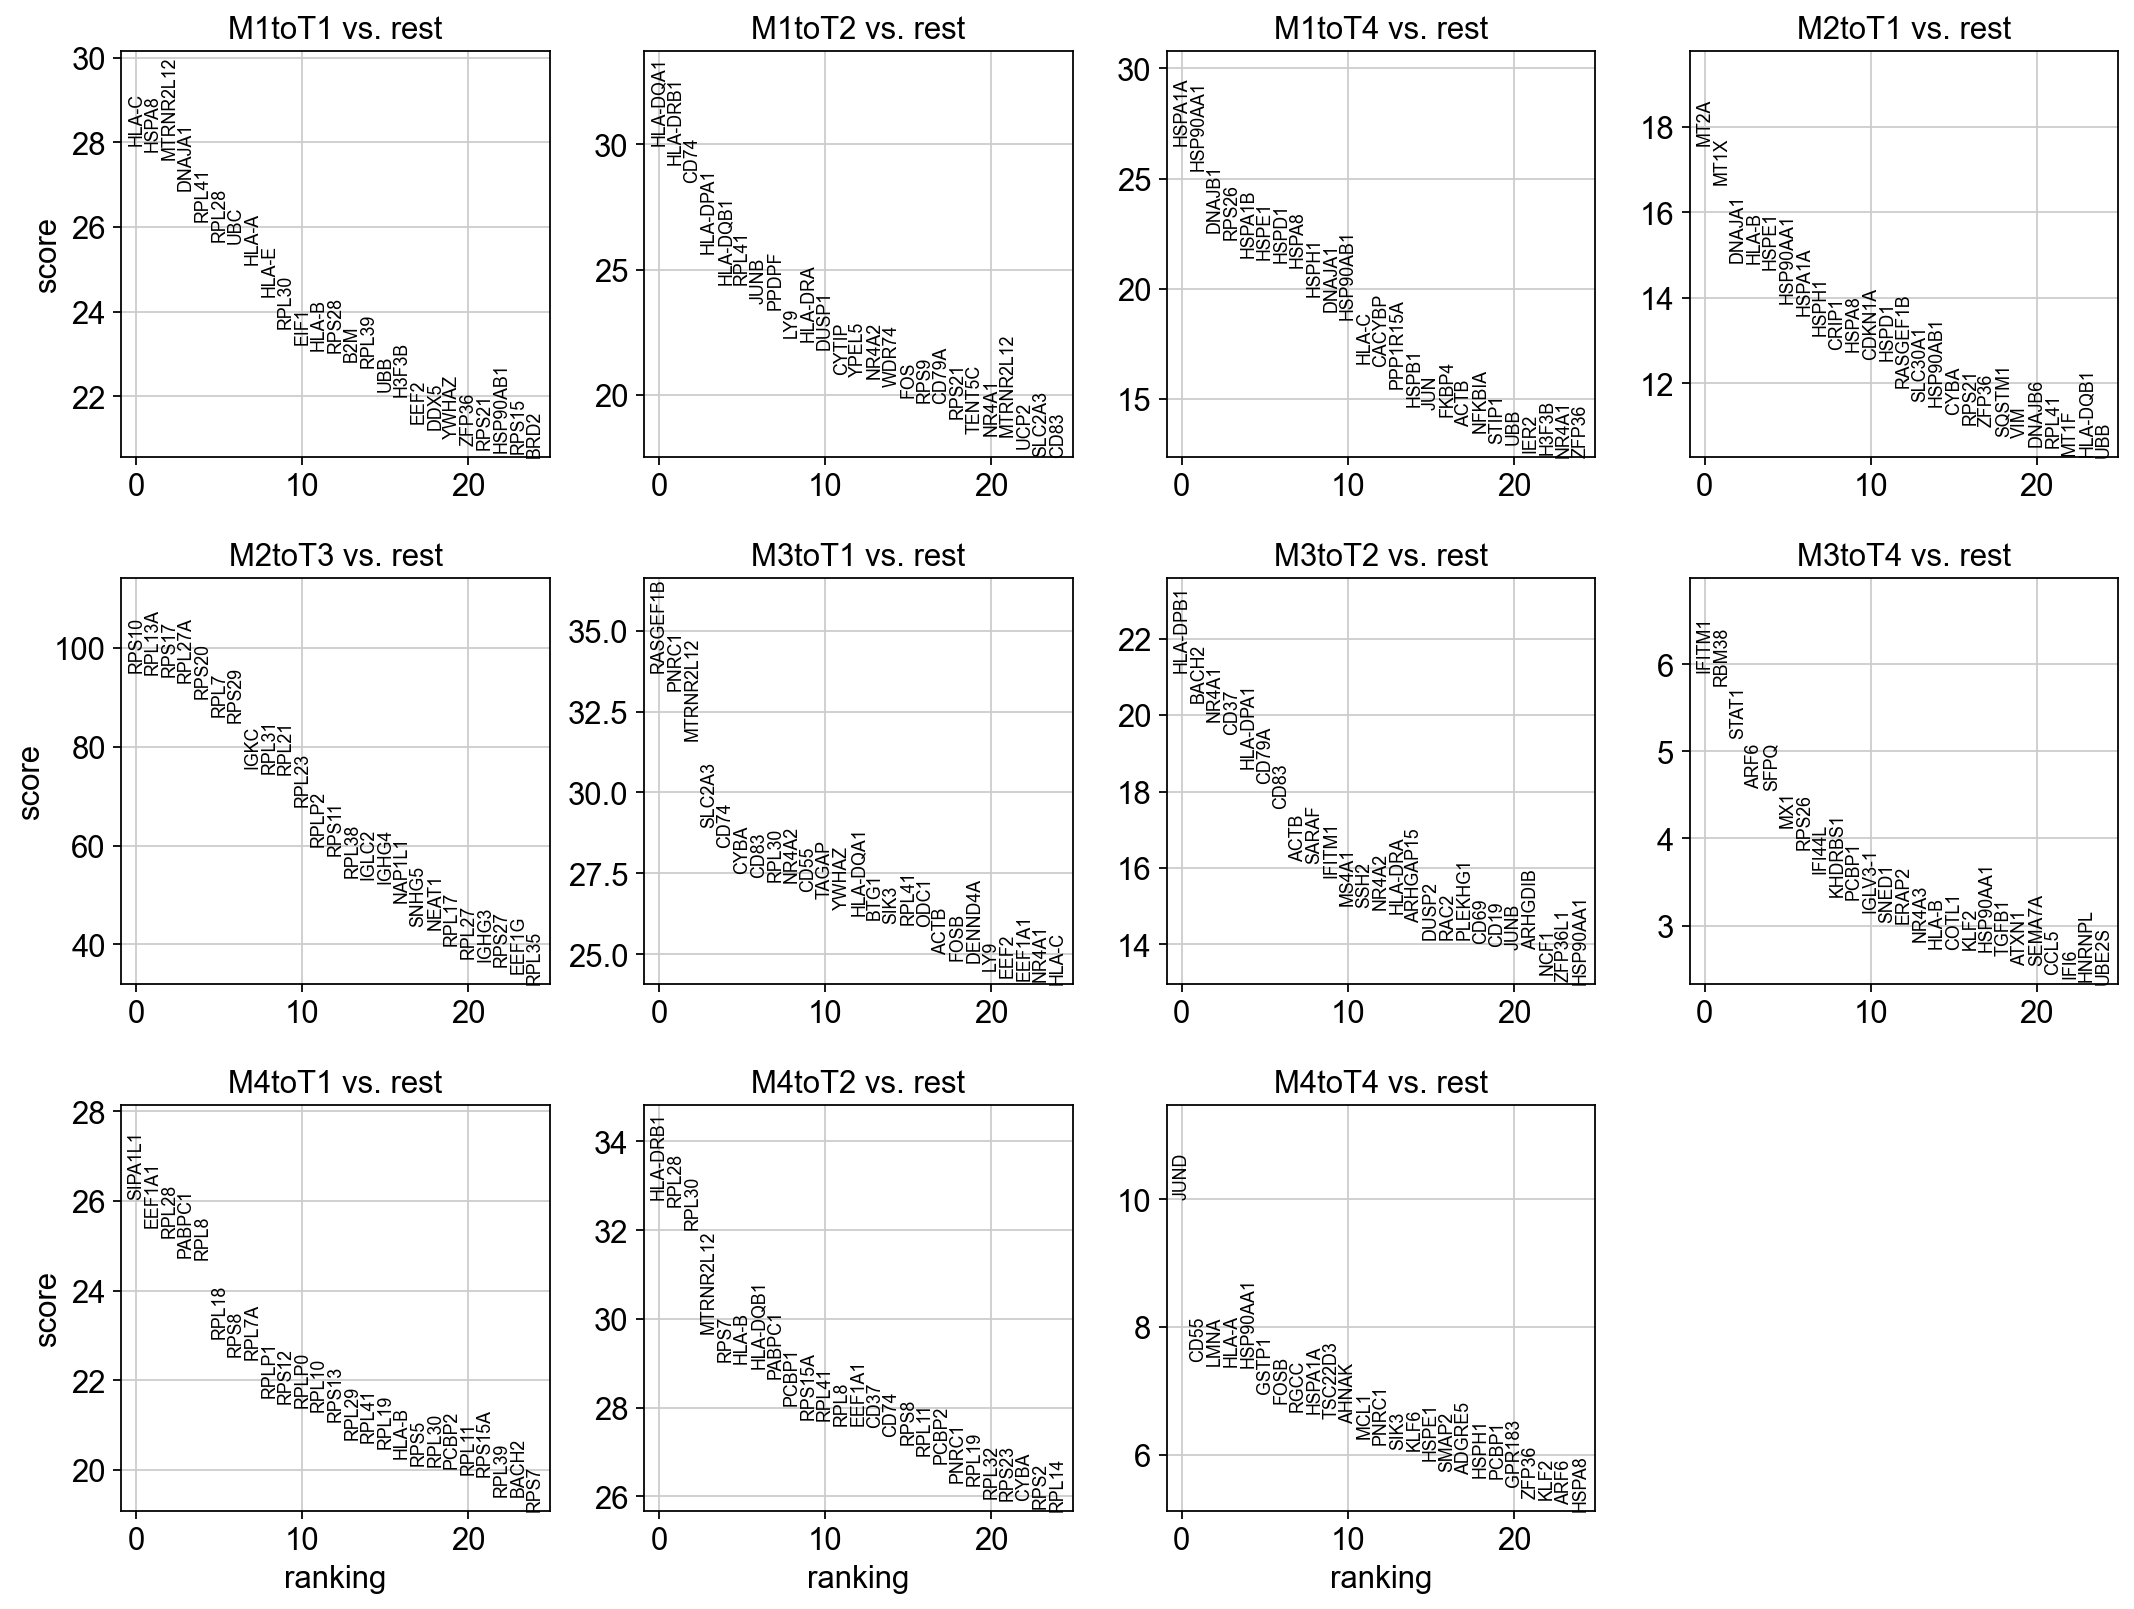

In [13]:
sc.tl.rank_genes_groups(adata_F, 'Myeloid_to_T_cluster44', method='wilcoxon', key_added = "MtoT_rank_genes")
sc.pl.rank_genes_groups(adata_F, n_genes=25, sharey=False, key = "MtoT_rank_genes")

In [14]:
df=pd.DataFrame(adata_F.uns['MtoT_rank_genes']['names'])
df.to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/Myeloid_to_T_cell_group_markergene_in_Bcell.csv",
                 sep=',', na_rep='', float_format=None, columns=None, header=True, 
                 index=True, index_label=None, mode='w', encoding=None, compression='infer', 
                 quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None)

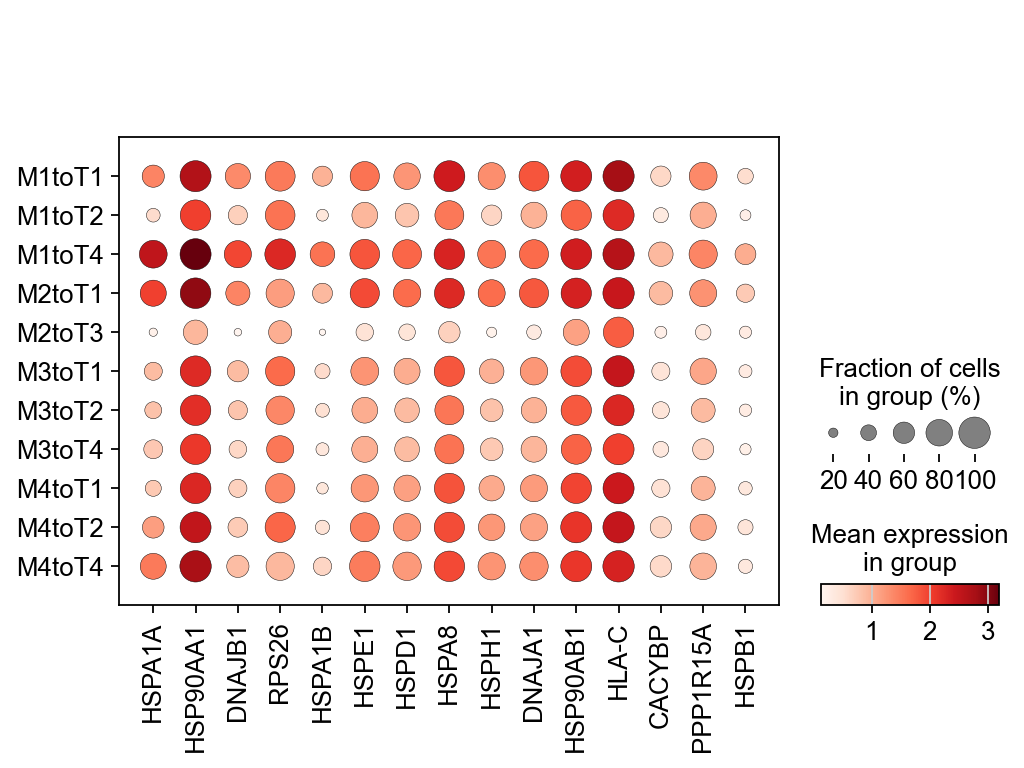

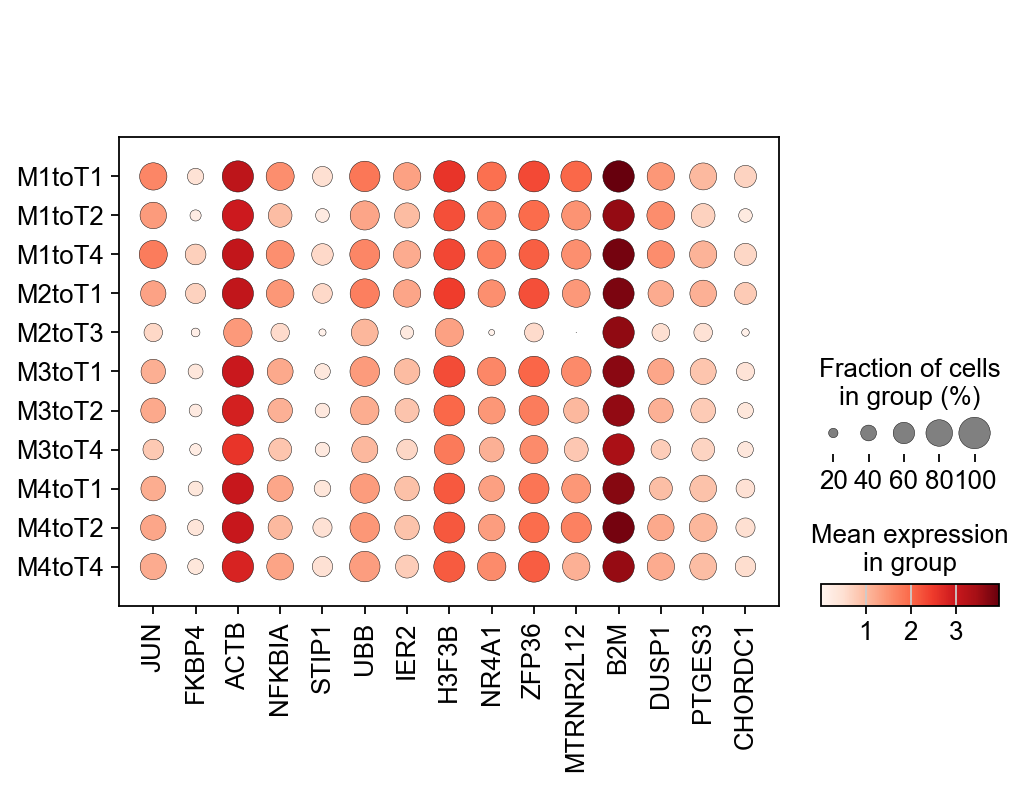

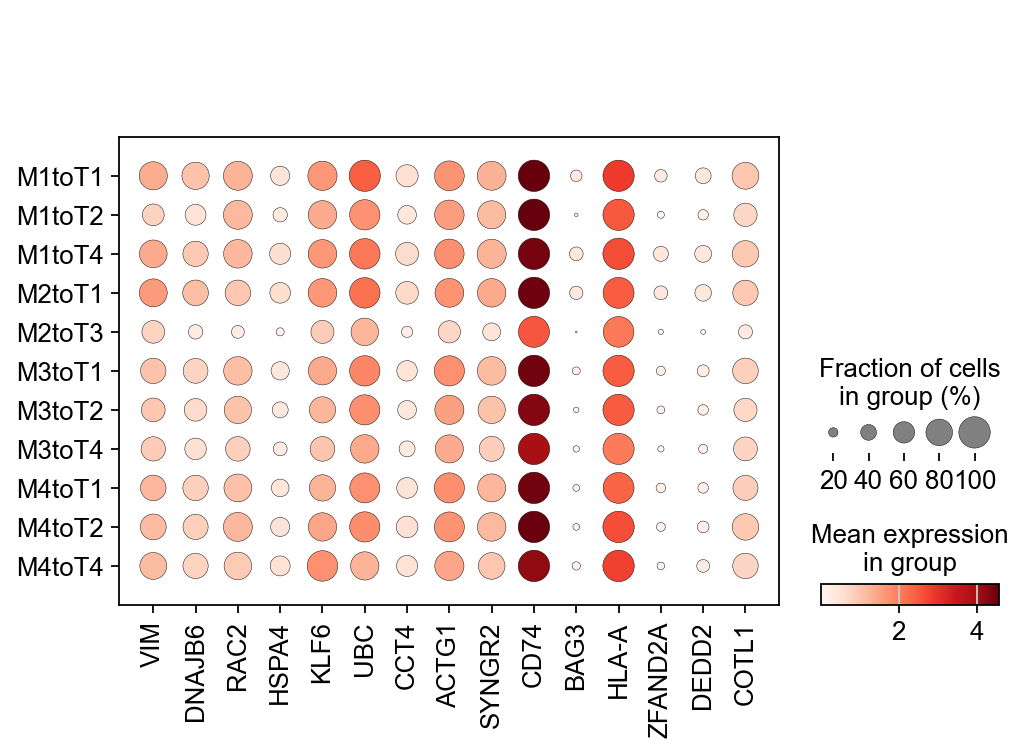

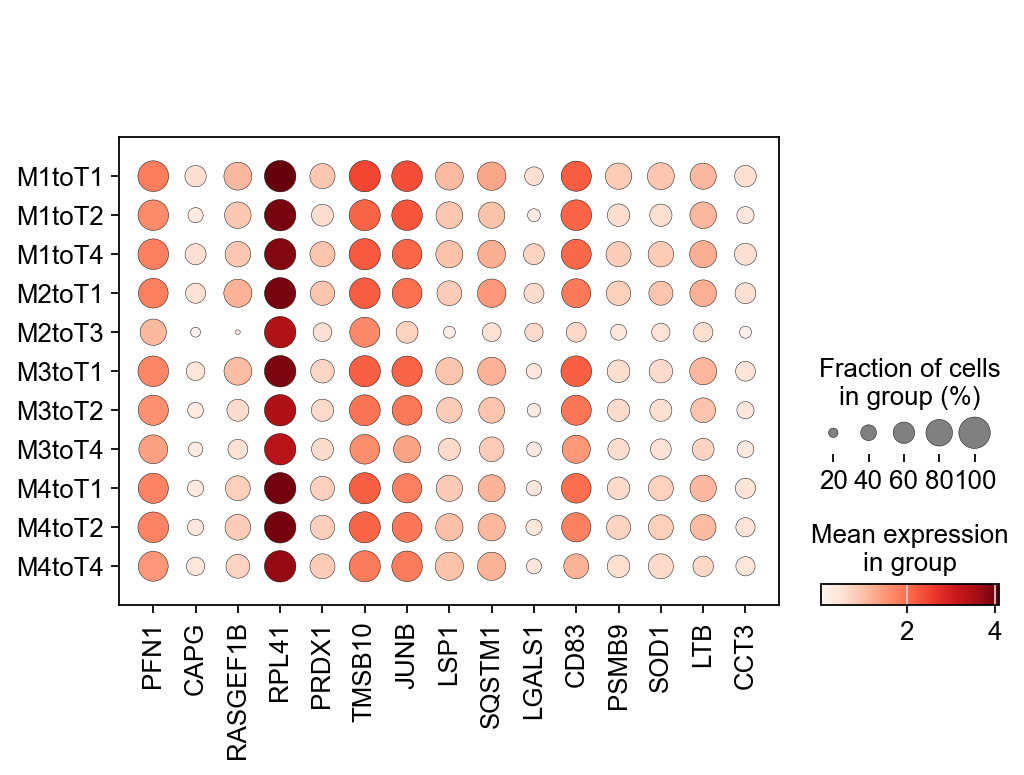

In [15]:
#M1T4
sc.pl.dotplot(adata_F, ["HSPA1A",	"HSP90AA1",	"DNAJB1",	"RPS26",	"HSPA1B",	"HSPE1",	"HSPD1",	"HSPA8",	"HSPH1",	"DNAJA1",	"HSP90AB1",	"HLA-C",	"CACYBP",	"PPP1R15A",	"HSPB1",
], groupby=['Myeloid_to_T_cluster44'])
sc.pl.dotplot(adata_F, ["JUN",	"FKBP4",	"ACTB",	"NFKBIA",	"STIP1",	"UBB",	"IER2",	"H3F3B",	"NR4A1",	"ZFP36",	"MTRNR2L12",	"B2M",	"DUSP1",	"PTGES3",	"CHORDC1",
],groupby=['Myeloid_to_T_cluster44'])

sc.pl.dotplot(adata_F, ["VIM",	"DNAJB6",	"RAC2",	"HSPA4",	"KLF6",	"UBC",	"CCT4",	"ACTG1",	"SYNGR2",	"CD74",	"BAG3",	"HLA-A",	"ZFAND2A",	"DEDD2",	"COTL1",
], 
              groupby=['Myeloid_to_T_cluster44'])
sc.pl.dotplot(adata_F, ["PFN1",	"CAPG",	"RASGEF1B",	"RPL41",	"PRDX1",	"TMSB10",	"JUNB",	"LSP1",	"SQSTM1",	"LGALS1",	"CD83",	"PSMB9",	"SOD1",	"LTB",	"CCT3",
], 
              groupby=['Myeloid_to_T_cluster44'])



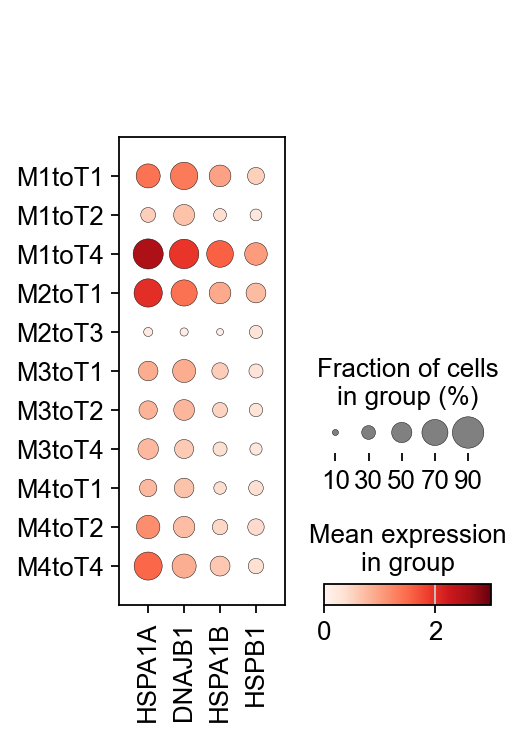

In [16]:
#M1T4
sc.pl.dotplot(adata_F, ['HSPA1A','DNAJB1', 'HSPA1B',"HSPB1"
                       ],
              vmin=0,vmax=3, groupby=['Myeloid_to_T_cluster44'])

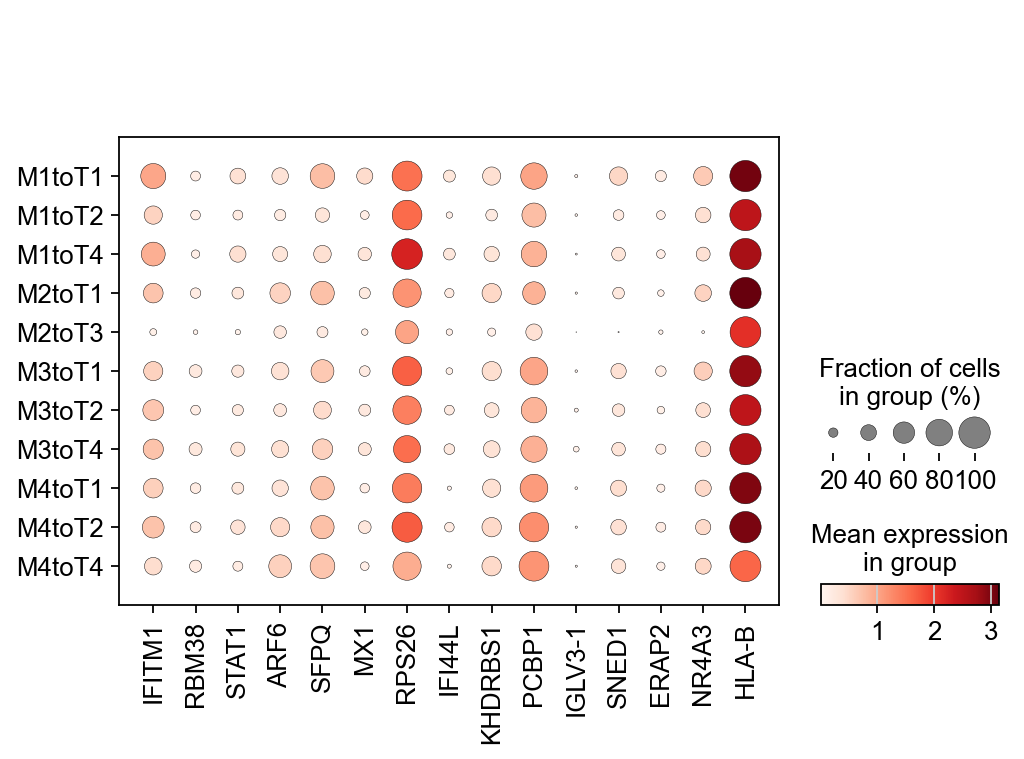

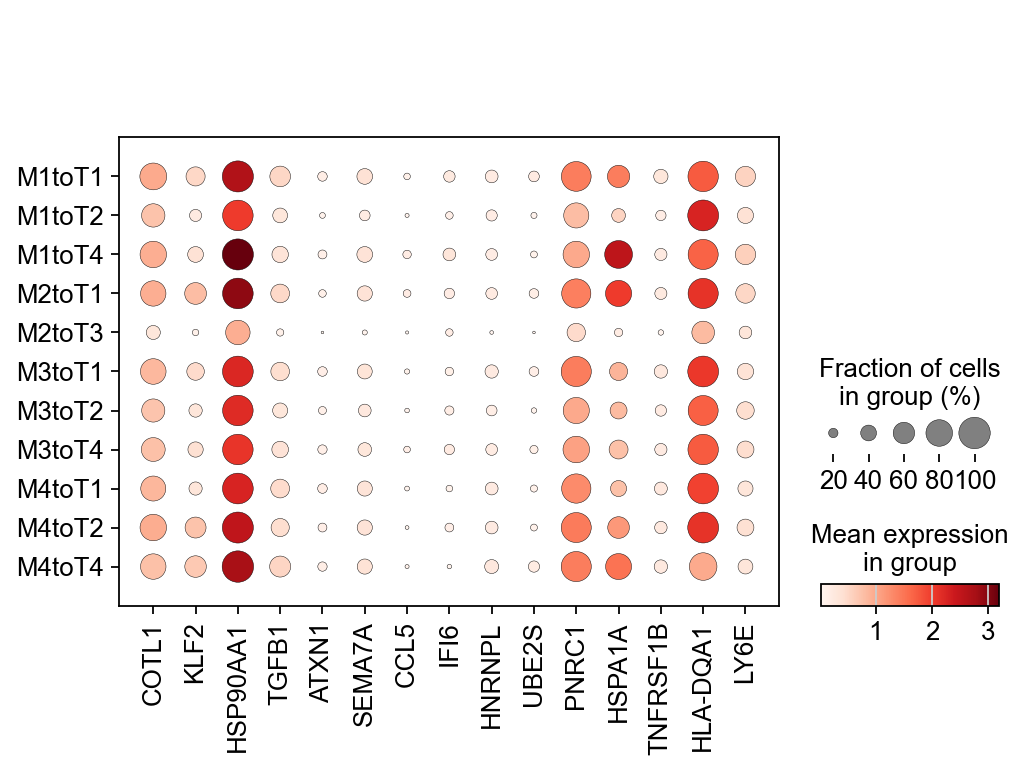

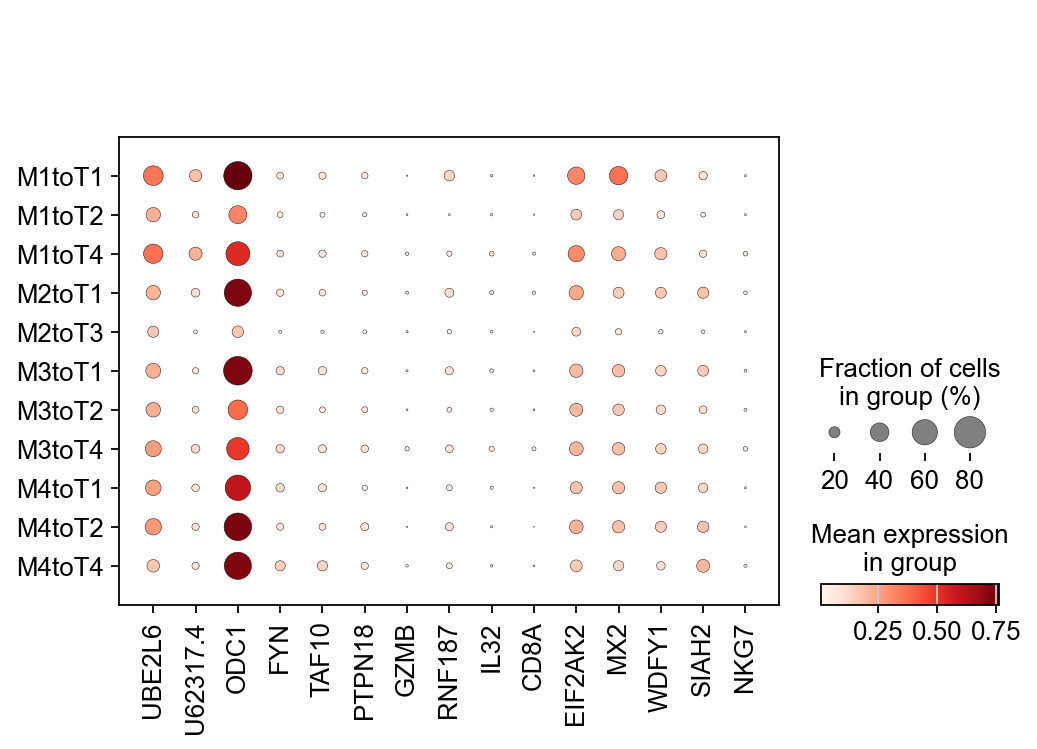

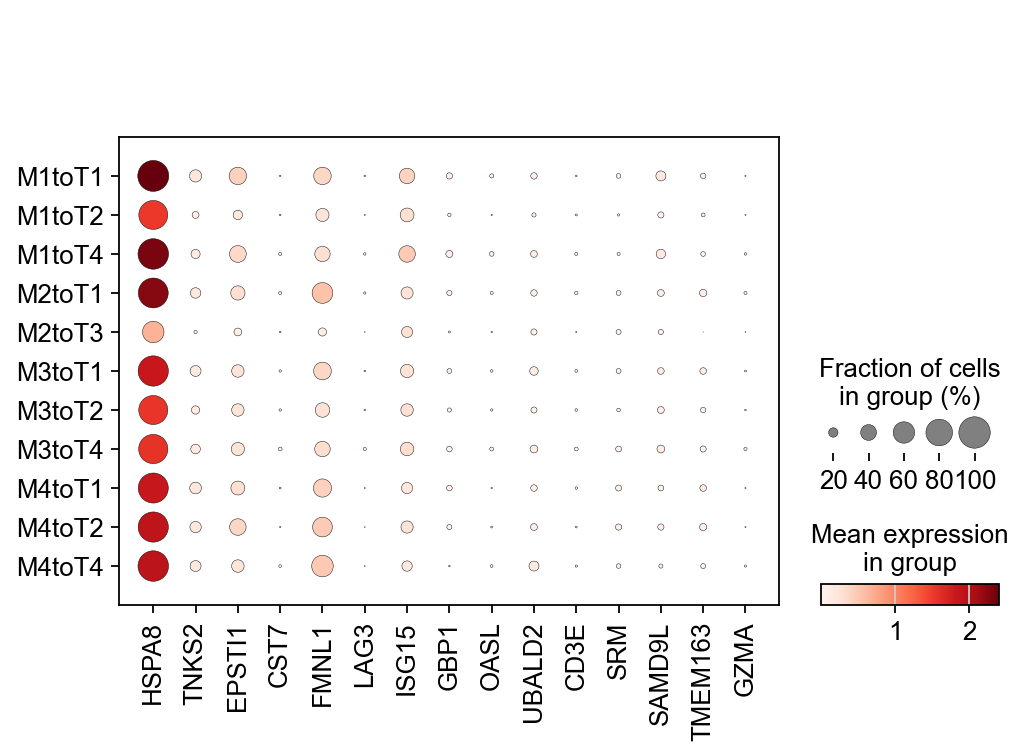

In [17]:
#M3T4
sc.pl.dotplot(adata_F, ["IFITM1",	"RBM38",	"STAT1",	"ARF6",	"SFPQ",	"MX1",	"RPS26",	"IFI44L",	"KHDRBS1",	"PCBP1",	"IGLV3-1",	"SNED1",	"ERAP2",	"NR4A3",	"HLA-B",
], groupby=['Myeloid_to_T_cluster44'])
sc.pl.dotplot(adata_F, ["COTL1",	"KLF2",	"HSP90AA1",	"TGFB1",	"ATXN1",	"SEMA7A",	"CCL5",	"IFI6",	"HNRNPL",	"UBE2S",	"PNRC1",	"HSPA1A",	"TNFRSF1B",	"HLA-DQA1",	"LY6E",
], groupby=['Myeloid_to_T_cluster44'])
sc.pl.dotplot(adata_F, ["UBE2L6",	"U62317.4",	"ODC1",	"FYN",	"TAF10",	"PTPN18",	"GZMB",	"RNF187",	"IL32",	"CD8A",	"EIF2AK2",	"MX2",	"WDFY1",	"SIAH2",	"NKG7",
], groupby=['Myeloid_to_T_cluster44'])
sc.pl.dotplot(adata_F, ["HSPA8",	"TNKS2",	"EPSTI1",	"CST7",	"FMNL1",	"LAG3",	"ISG15",	"GBP1",	"OASL",	"UBALD2",	"CD3E",	"SRM",	"SAMD9L",	"TMEM163",	"GZMA",
], groupby=['Myeloid_to_T_cluster44'])

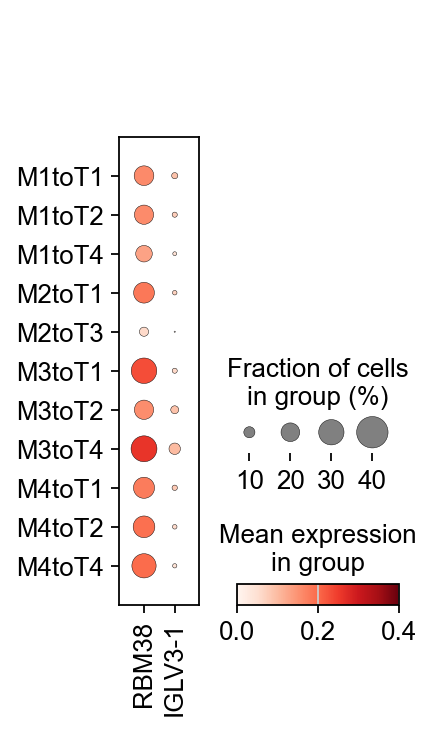

In [18]:
#M3T4
sc.pl.dotplot(adata_F, ['RBM38','IGLV3-1'],
              vmin=0,vmax=0.4,groupby=['Myeloid_to_T_cluster44'])


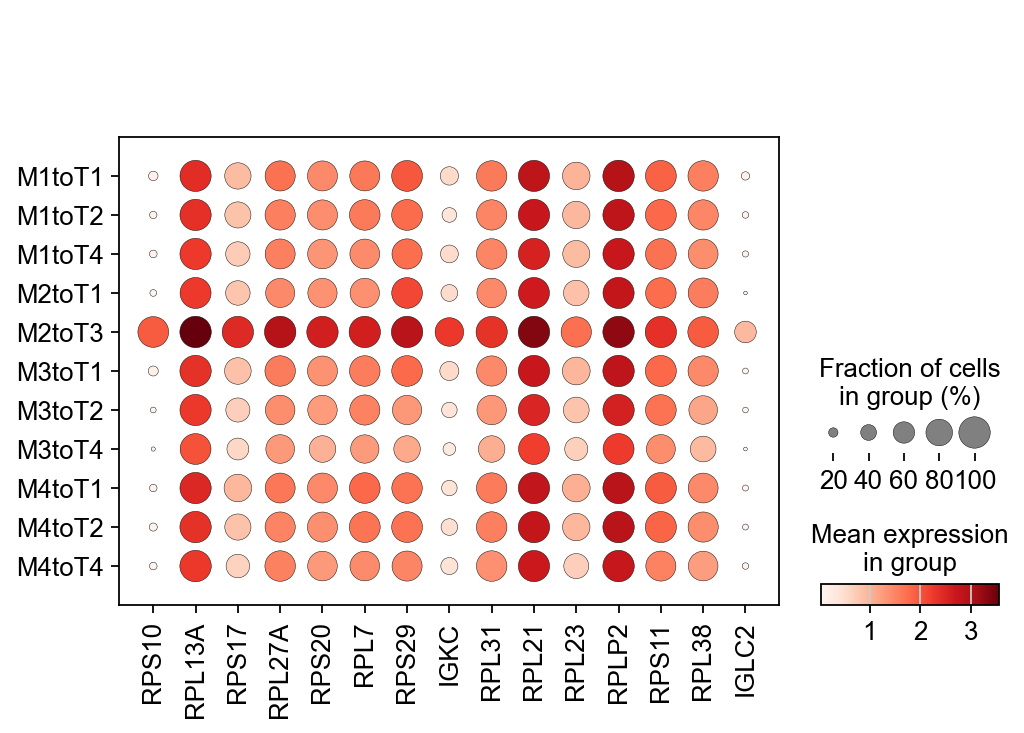

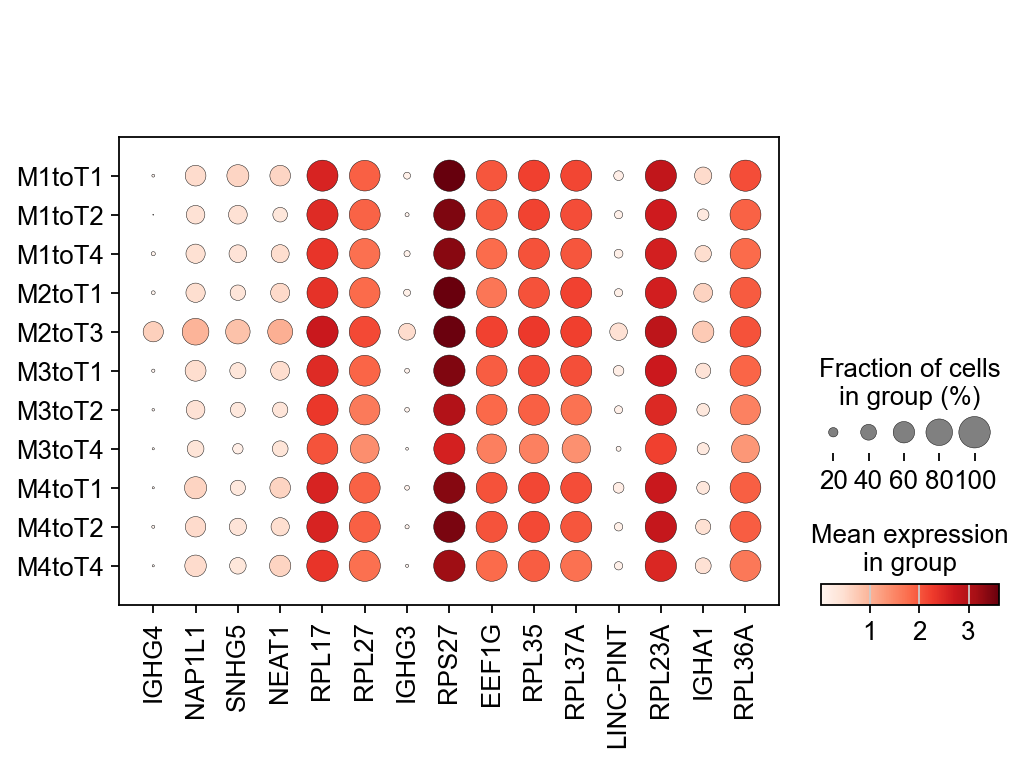

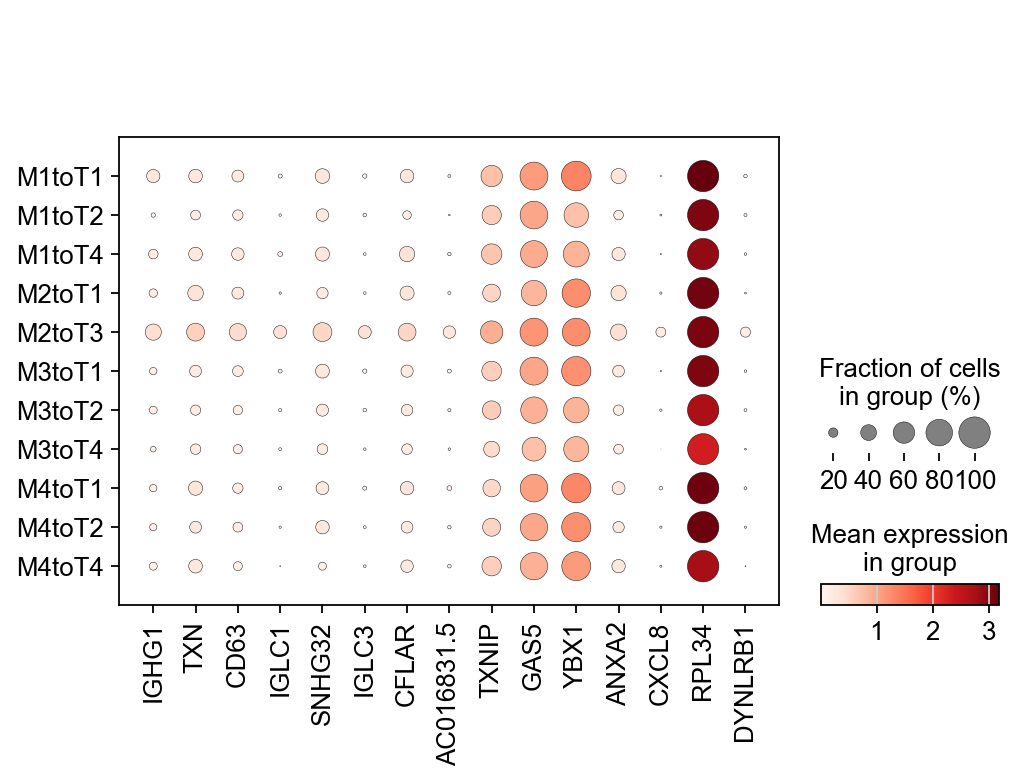

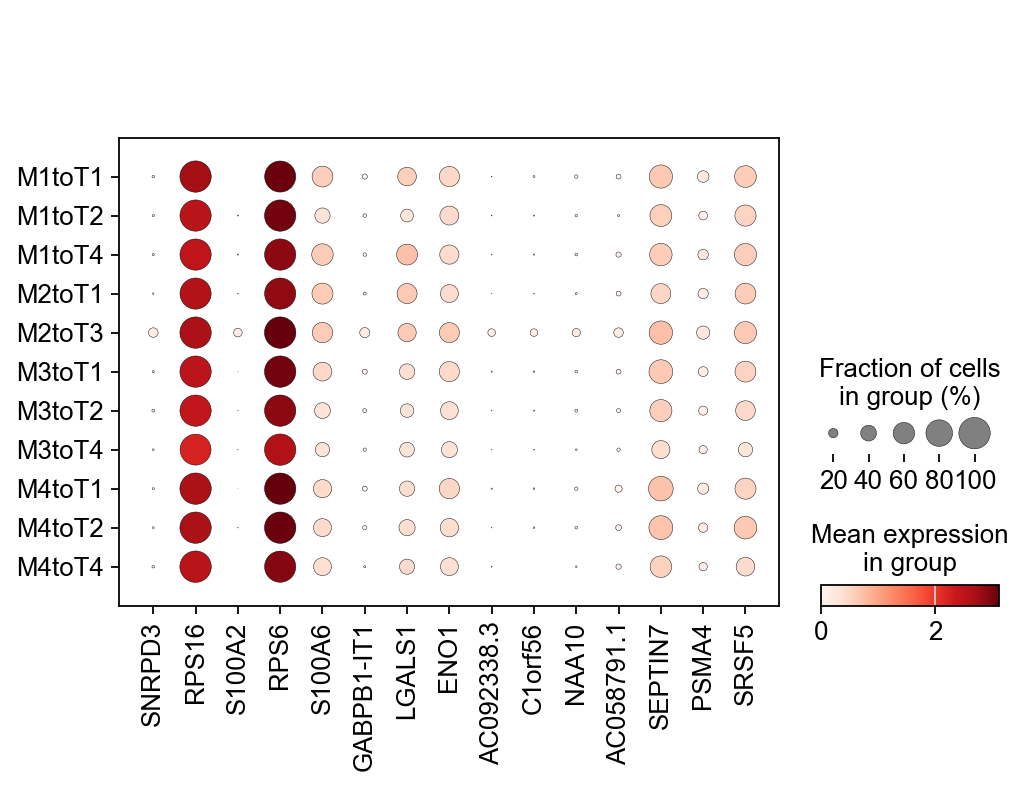

In [19]:
#M2T3
sc.pl.dotplot(adata_F, ["RPS10",	"RPL13A",	"RPS17",	"RPL27A",	"RPS20",	"RPL7",	"RPS29",	"IGKC",	"RPL31",	"RPL21",	"RPL23",	"RPLP2",	"RPS11",	"RPL38",	"IGLC2",
], groupby=['Myeloid_to_T_cluster44'])
sc.pl.dotplot(adata_F, ["IGHG4",	"NAP1L1",	"SNHG5",	"NEAT1",	"RPL17",	"RPL27",	"IGHG3",	"RPS27",	"EEF1G",	"RPL35",	"RPL37A",	"LINC-PINT",	"RPL23A",	"IGHA1",	"RPL36A",
], groupby=['Myeloid_to_T_cluster44'])
sc.pl.dotplot(adata_F, ["IGHG1",	"TXN",	"CD63",	"IGLC1",	"SNHG32",	"IGLC3",	"CFLAR",	"AC016831.5",	"TXNIP",	"GAS5",	"YBX1",	"ANXA2",	"CXCL8",	"RPL34",	"DYNLRB1",
], groupby=['Myeloid_to_T_cluster44'])
sc.pl.dotplot(adata_F, ["SNRPD3",	"RPS16",	"S100A2",	"RPS6",	"S100A6",	"GABPB1-IT1",	"LGALS1",	"ENO1",	"AC092338.3",	"C1orf56",	"NAA10",	"AC058791.1",	"SEPTIN7",	"PSMA4",	"SRSF5",
], groupby=['Myeloid_to_T_cluster44'])

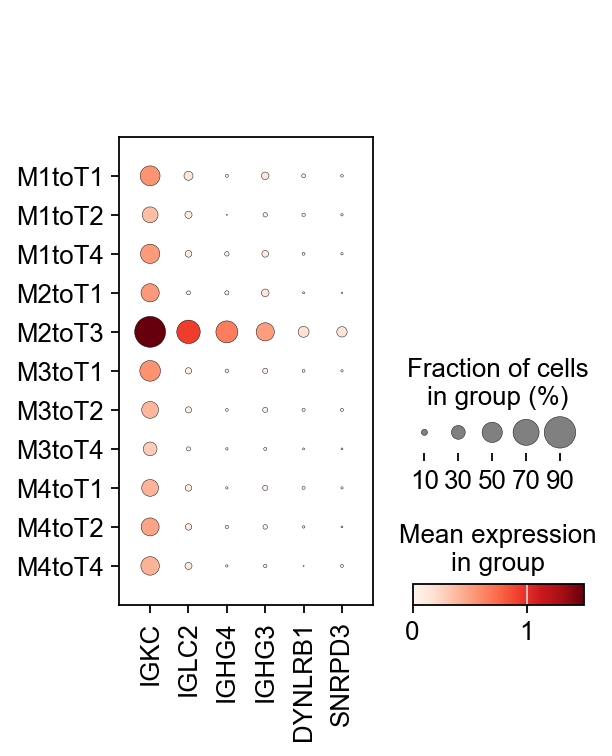

In [20]:
#M2T3
#STK4 good prognosis
sc.pl.dotplot(adata_F, ["IGKC",	"IGLC2","IGHG4","IGHG3","DYNLRB1","SNRPD3"],vmin=0, vmax=1.5, groupby=['Myeloid_to_T_cluster44'])

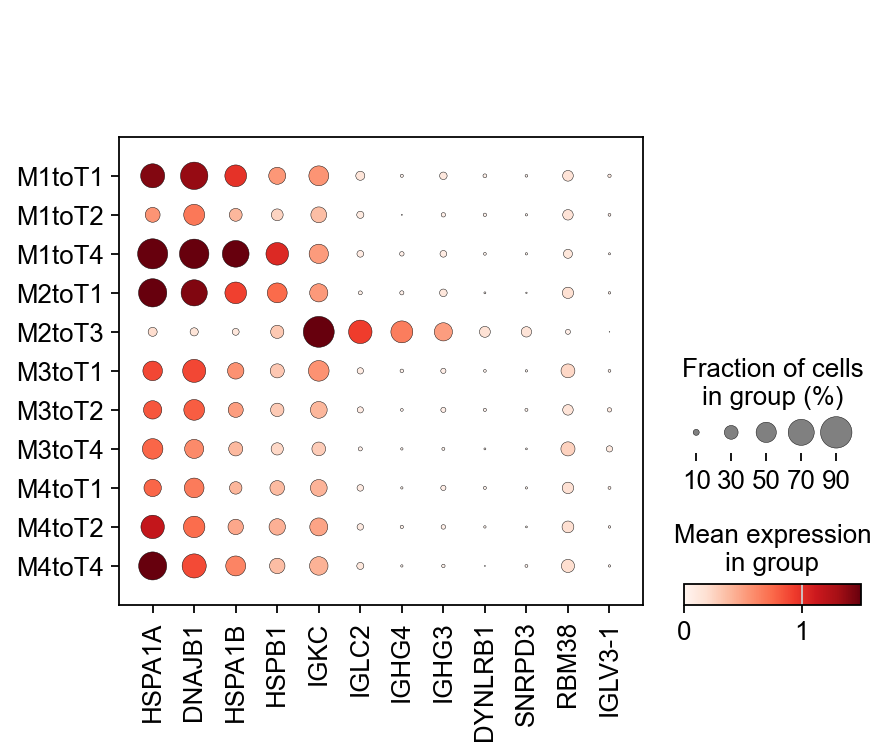

In [21]:
#M1T4,M3T4, M2T3
sc.pl.dotplot(adata_F, ['HSPA1A','DNAJB1', 'HSPA1B',"HSPB1",
   	"IGKC",	"IGLC2","IGHG4","IGHG3","DYNLRB1","SNRPD3",
                       'RBM38','IGLV3-1' ],vmin=0, vmax=1.5, groupby=['Myeloid_to_T_cluster44'],
             save='biomarkers_of_B_cell_M1T4,M2T3,M3T4.pdf')

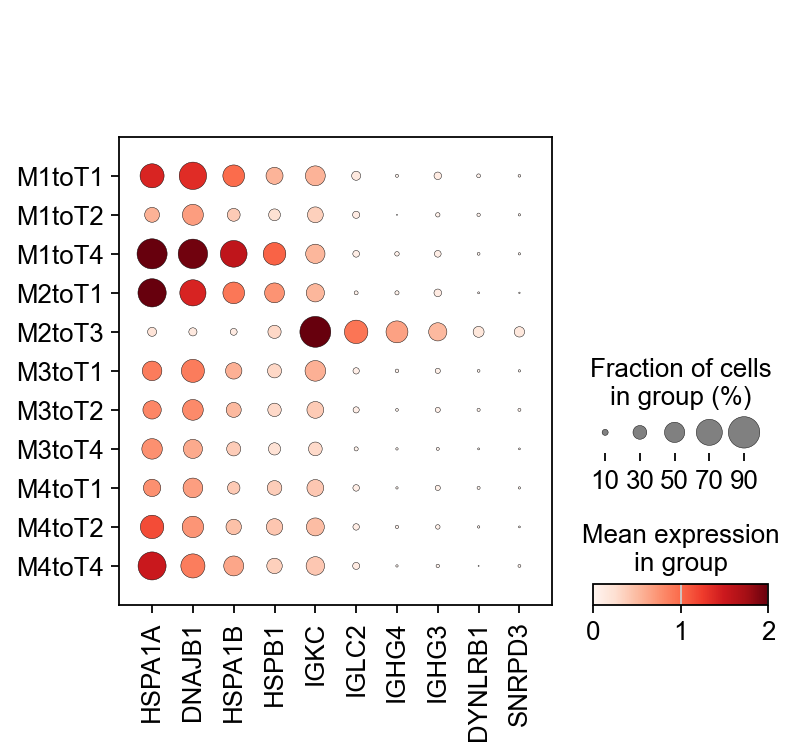

In [22]:
#M1T4,M3T4, M2T2
sc.pl.dotplot(adata_F, ['HSPA1A','DNAJB1', 'HSPA1B',"HSPB1",
                        "IGKC",	"IGLC2","IGHG4","IGHG3","DYNLRB1","SNRPD3"
  ],vmin=0, vmax=2, groupby=['Myeloid_to_T_cluster44'],
             save='biomarkers_of_B_cell_M1T4,M2T3.pdf')

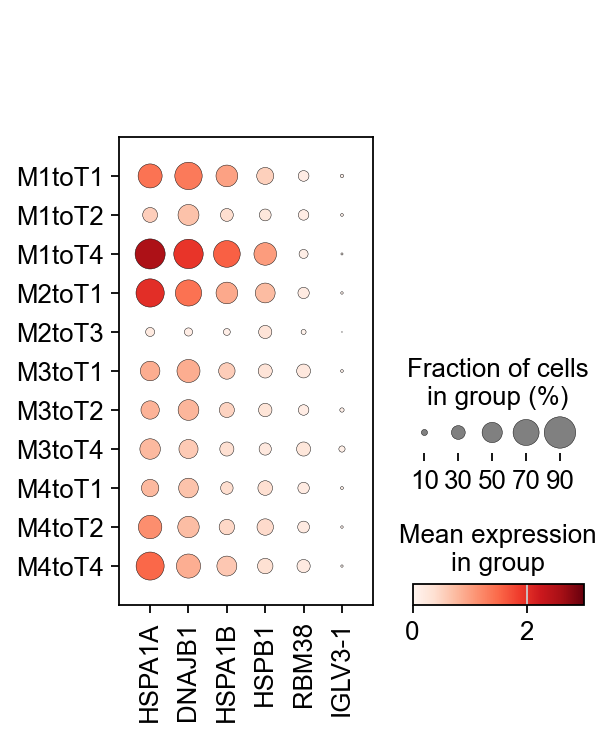

In [23]:
#M1T4,M3T4, M2T2
sc.pl.dotplot(adata_F, ['HSPA1A','DNAJB1', 'HSPA1B',"HSPB1",
                        'RBM38','IGLV3-1'
  ],vmin=0, vmax=3, groupby=['Myeloid_to_T_cluster44'],
             save='biomarkers_of_B_cell_M1T4,M3T4.pdf')

In [24]:
adata_F.write('B_cell_grouped.h5ad', compression='gzip')

In [25]:
#adata_F = sc.read('B_cell_grouped.h5ad')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'Fibroblast_grouped.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

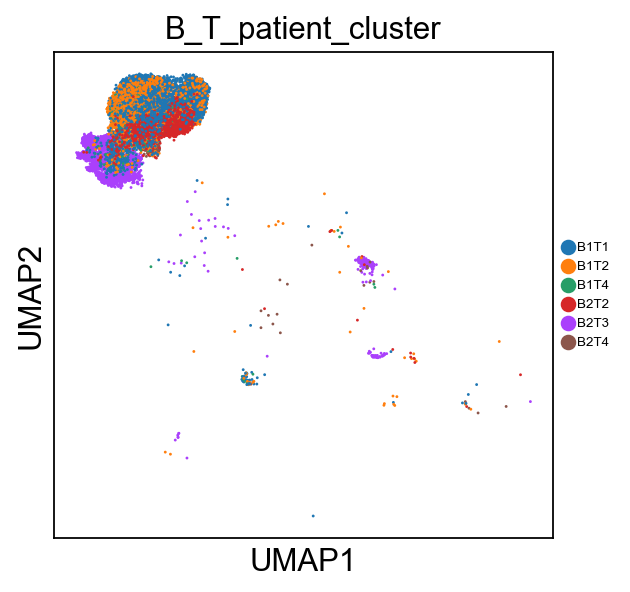

In [26]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'B1T1': ["P065",	"P062",	"P030",	"P057",	"P063",	"P012",	"P056",	"P027",	"P008",	"P001",	"P130",	"P028",	"P011",	"P126",	"P061",	"P010",	"P021",	"P015",	"P020",	"P032",	"P127",	"P049",	"P016",
],
             'B1T2':["P104",	"P128",	"P054",	"P002",	"P079",	"P076",	"P023",	"P084",	"P087",	"P017",	"P026",	"P042",	"P083",	"P019",	"P036",	"P037",	"P089",
],
             'B1T3':[],
             'B1T4':["P074",	"P052",	"P039",	"P075",	"P091",	"P009B",	"P024",	"P022",	"P080",	"P082",	"P047",	"P038",
],
            
             'B2T1': [],
            'B2T2': ["P048",	"P094",	"P031",	"P107",
],
             'B2T3':["P866",	"P836",	"P846",	"P986",	"P585",	"P658",	"P865",	"P944",	"P787",	"P686",
],
             'B2T4':["P040",	"P044",
]
        ,     'NoB_T4':['P009A']
             
              }

# Initialize empty column in cell metadata
adata_F.obs['Fibro_patient_cluster'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_F.obs.patient).isin(cell_dict[i])
    adata_F.obs.loc[ind,'B_T_patient_cluster'] = i

sc.pl.umap(adata_F, color=['B_T_patient_cluster'], legend_loc='right margin', legend_fontsize=6,)# save='umap_Fibro_T_patient_cluster_in_T_cell.pdf')


ranking genes
    finished: added to `.uns['B_T_class_rank_in_B_cell']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:24)


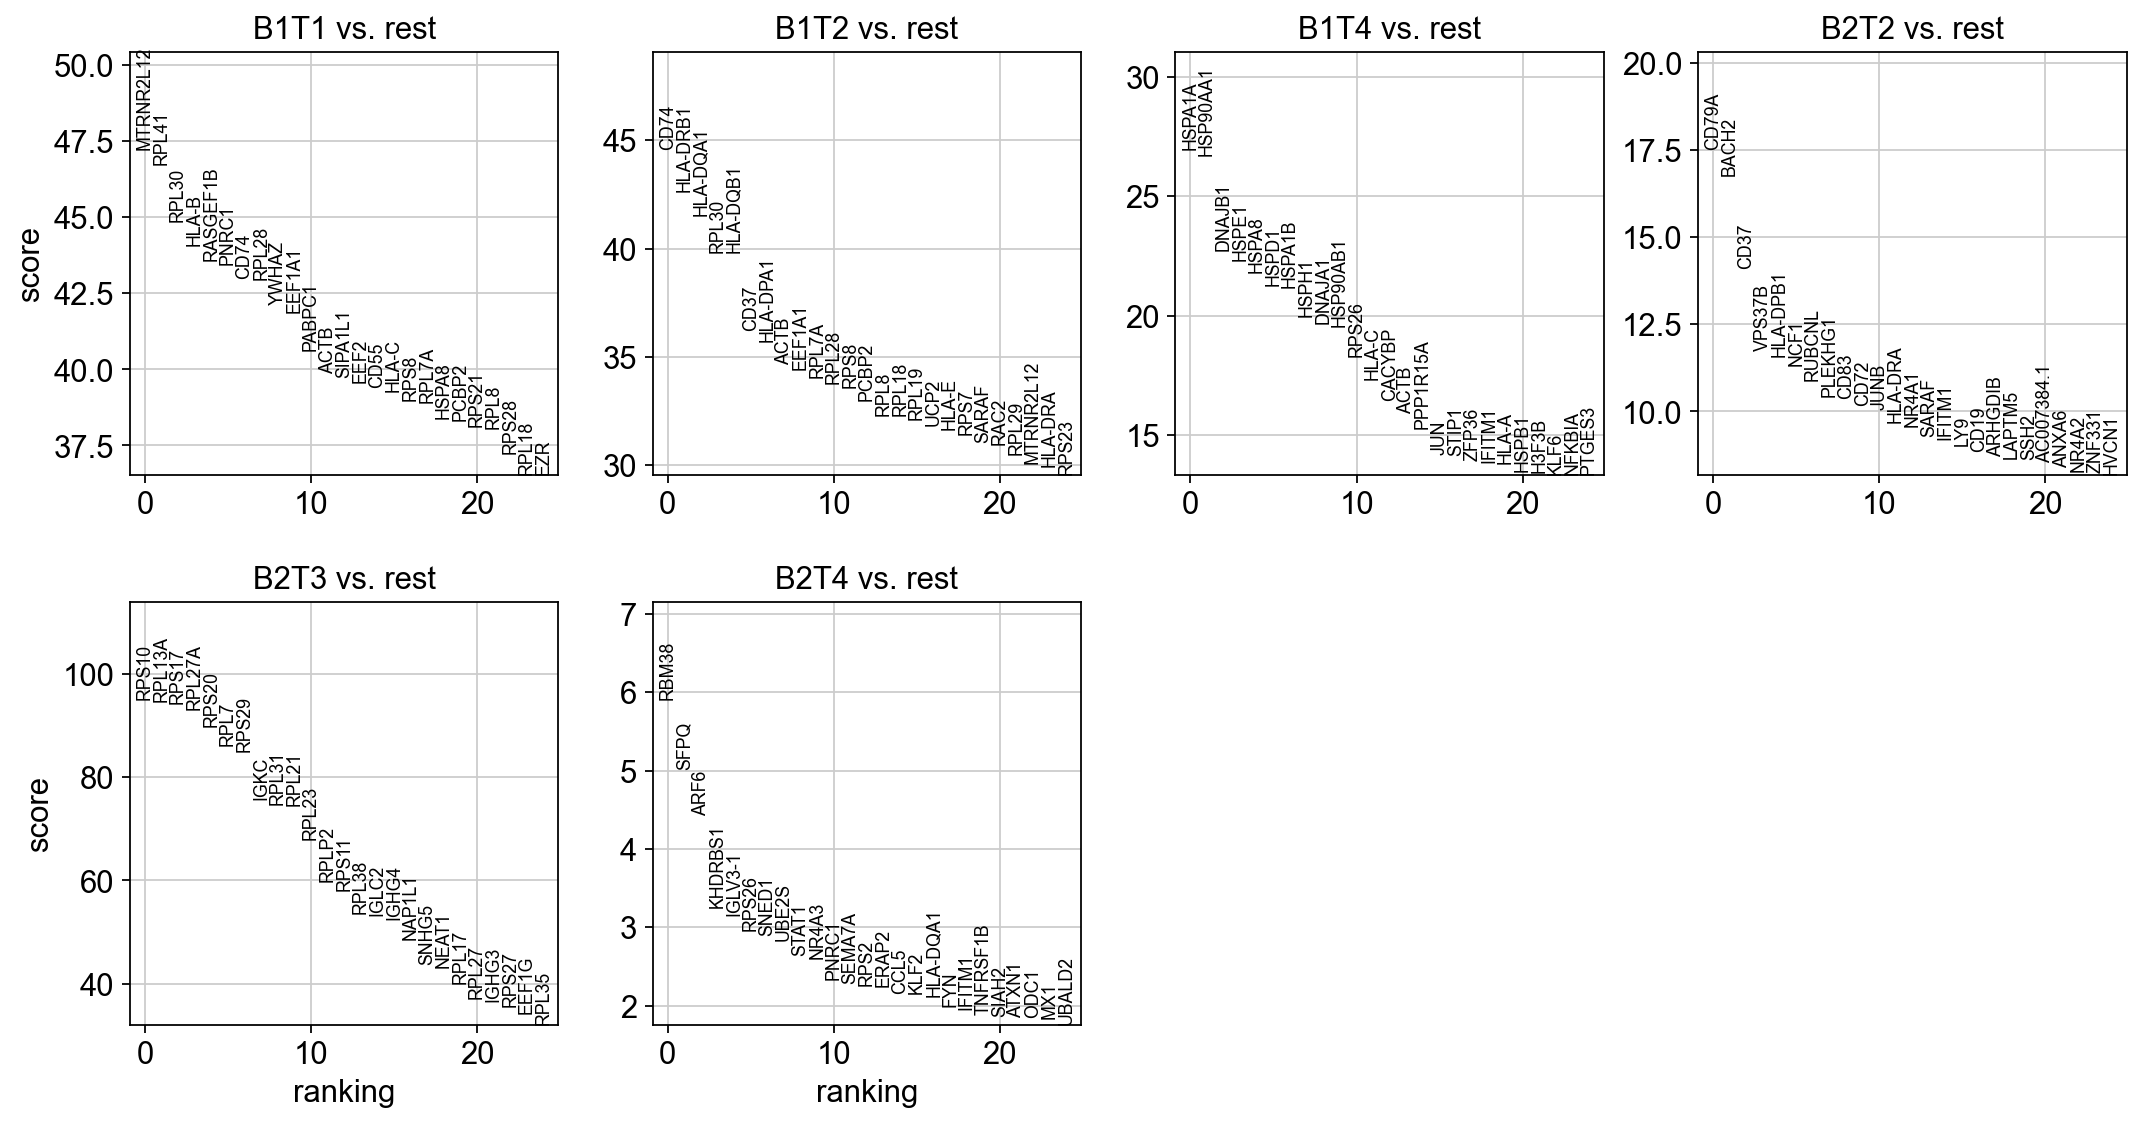

In [27]:
sc.tl.rank_genes_groups(adata_F, 'B_T_patient_cluster', method='wilcoxon', key_added = "B_T_class_rank_in_B_cell")
sc.pl.rank_genes_groups(adata_F, n_genes=25, sharey=False, key = "B_T_class_rank_in_B_cell")

In [28]:
df=pd.DataFrame(adata_F.uns['B_T_class_rank_in_B_cell']['names'])
df.to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/B_T_Cell_in_B_cell_modified.csv",
                 sep=',', na_rep='', float_format=None, columns=None, header=True, 
                 index=True, index_label=None, mode='w', encoding=None, compression='infer', 
                 quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None)

# check

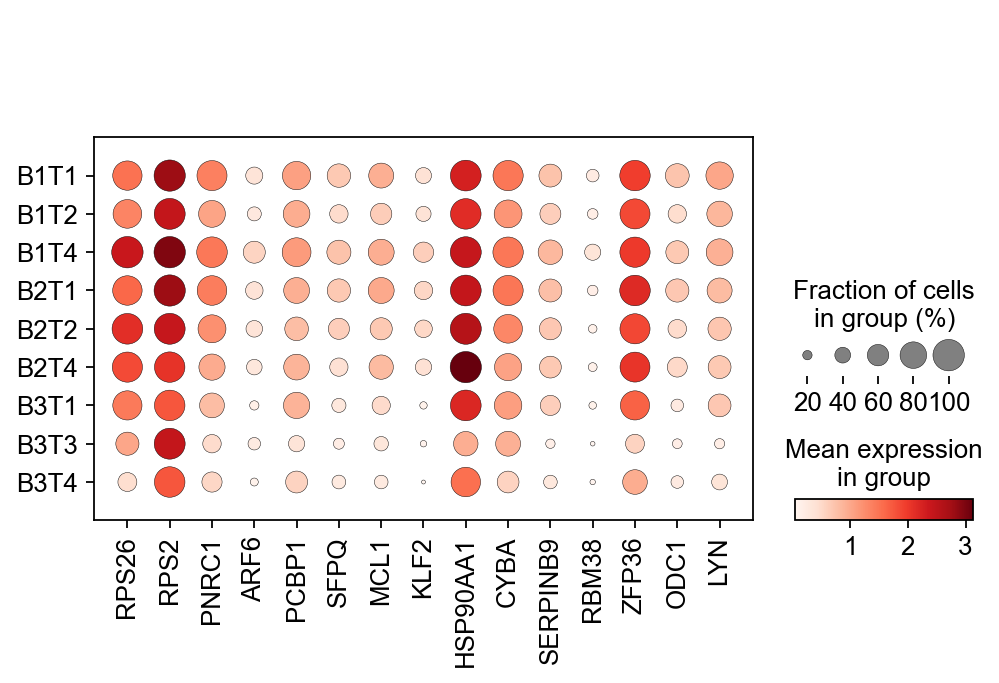

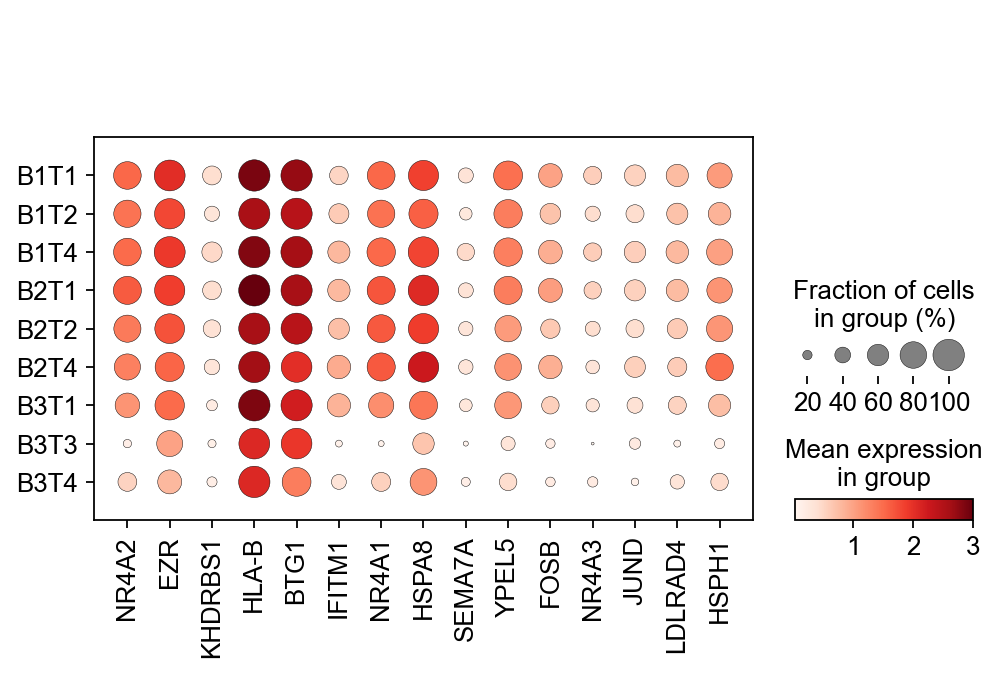

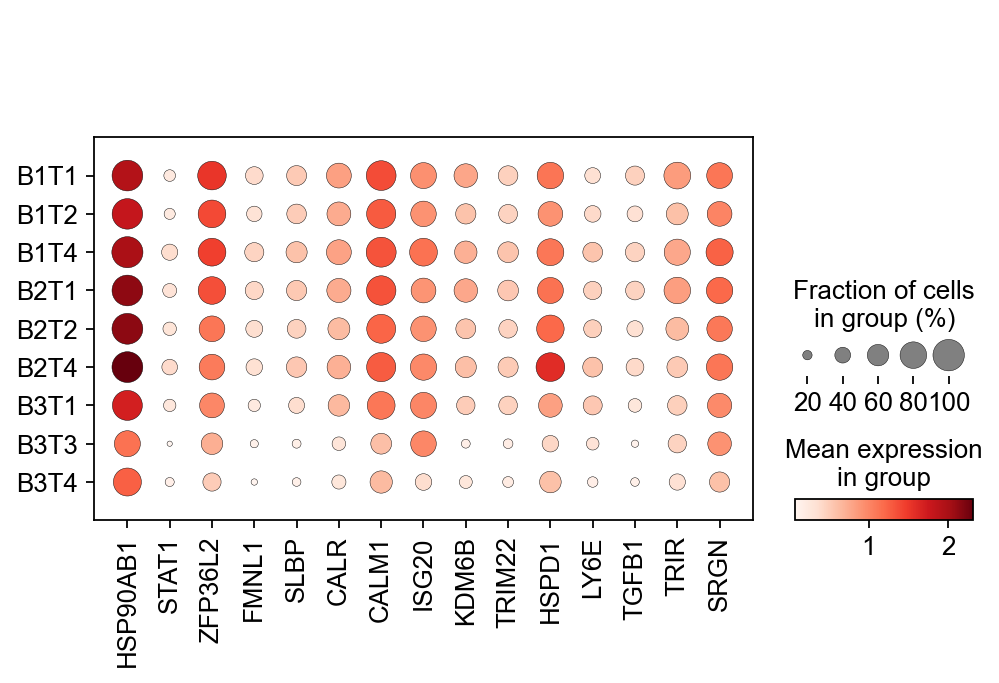

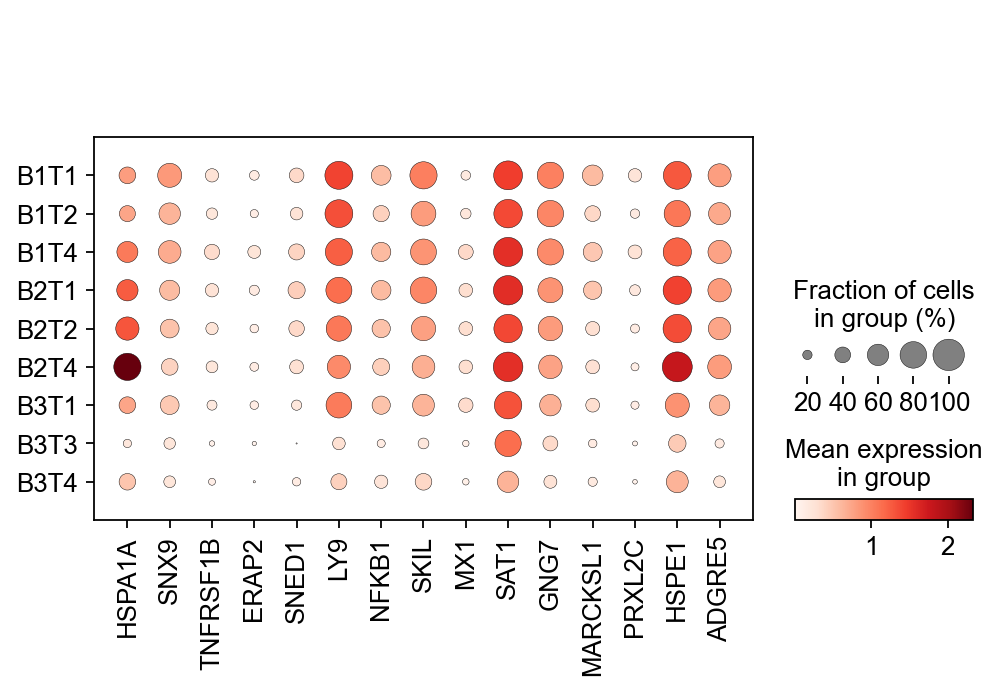

In [44]:
#B1T4
sc.pl.dotplot(adata_F, ["RPS26",	"RPS2",	"PNRC1",	"ARF6",	"PCBP1",	"SFPQ",	"MCL1",	"KLF2",	"HSP90AA1",	"CYBA",	"SERPINB9",	"RBM38",	"ZFP36",	"ODC1",	"LYN",
], groupby=['B_T_patient_cluster'])#,save='biomarkers_of_fibroblast_M1T4,M2T2,M3T4.pdf')
sc.pl.dotplot(adata_F, ["NR4A2",	"EZR",	"KHDRBS1",	"HLA-B",	"BTG1",	"IFITM1",	"NR4A1",	"HSPA8",	"SEMA7A",	"YPEL5",	"FOSB",	"NR4A3",	"JUND",	"LDLRAD4",	"HSPH1",
], groupby=['B_T_patient_cluster'])
sc.pl.dotplot(adata_F, ["HSP90AB1",	"STAT1",	"ZFP36L2",	"FMNL1",	"SLBP",	"CALR",	"CALM1",	"ISG20",	"KDM6B",	"TRIM22",	"HSPD1",	"LY6E",	"TGFB1",	"TRIR",	"SRGN",
], groupby=['B_T_patient_cluster'])
sc.pl.dotplot(adata_F, ["HSPA1A",	"SNX9",	"TNFRSF1B",	"ERAP2",	"SNED1",	"LY9",	"NFKB1",	"SKIL",	"MX1",	"SAT1",	"GNG7",	"MARCKSL1",	"PRXL2C",	"HSPE1",	"ADGRE5",
], groupby=['B_T_patient_cluster'])


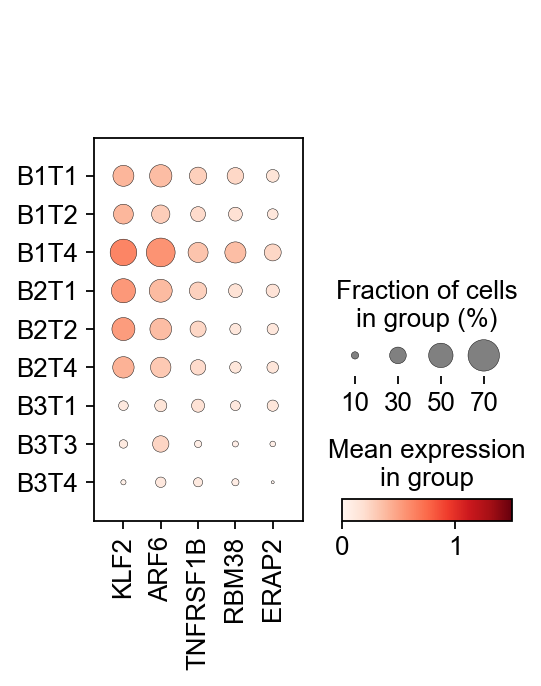

In [51]:
#B1T4
#FABP5,S100A10,VDAC2 : bad prognosis
sc.pl.dotplot(adata_F, ["KLF2","ARF6","TNFRSF1B","RBM38","ERAP2"],vmin=0, vmax=1.5, groupby=['B_T_patient_cluster'])

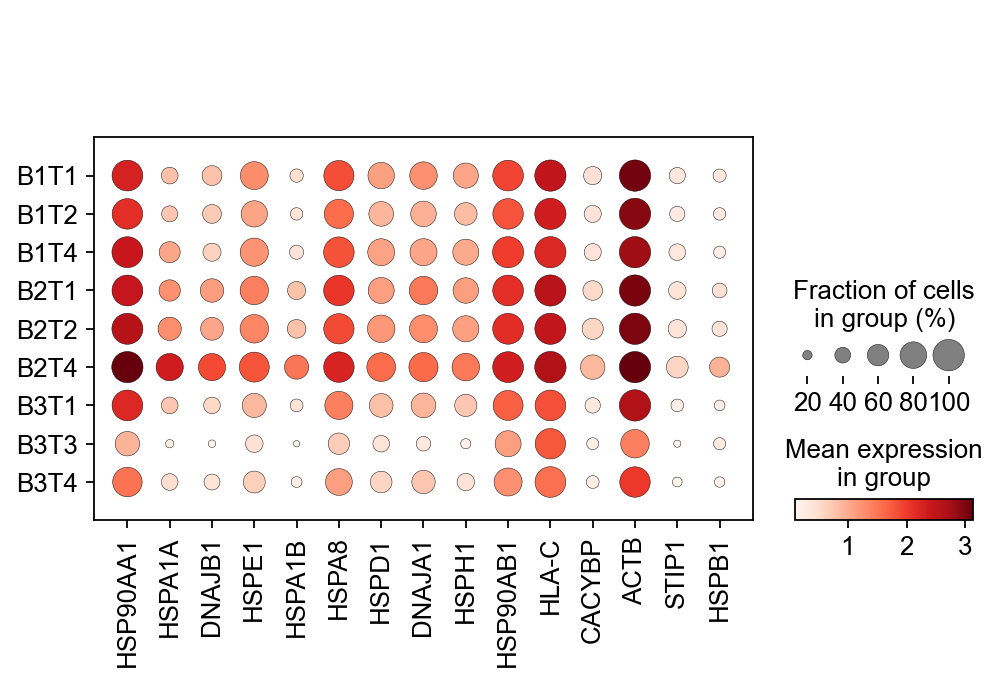

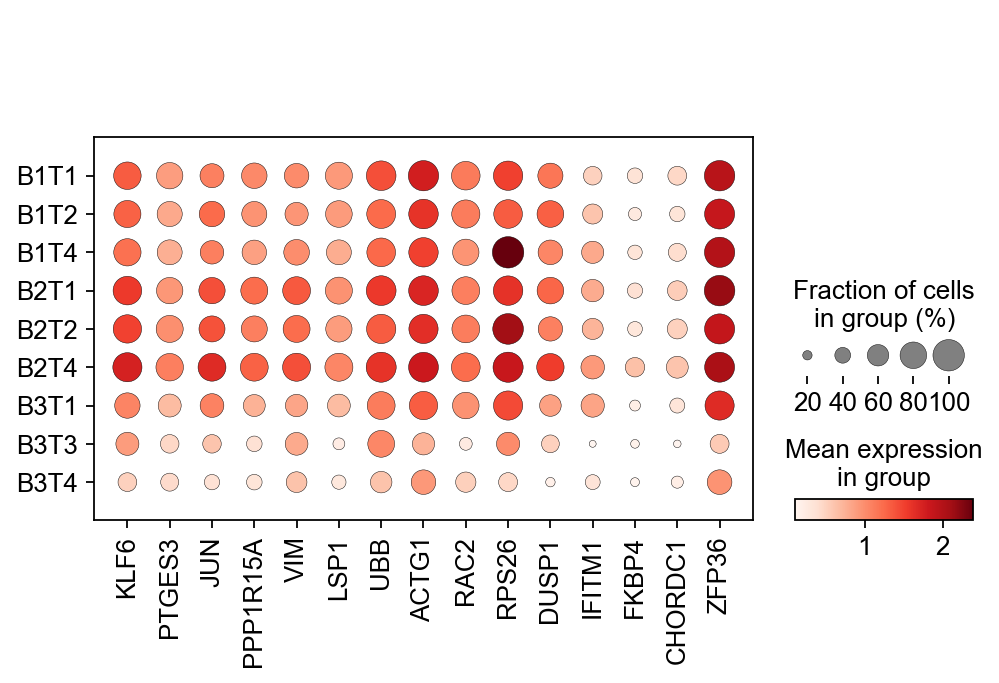

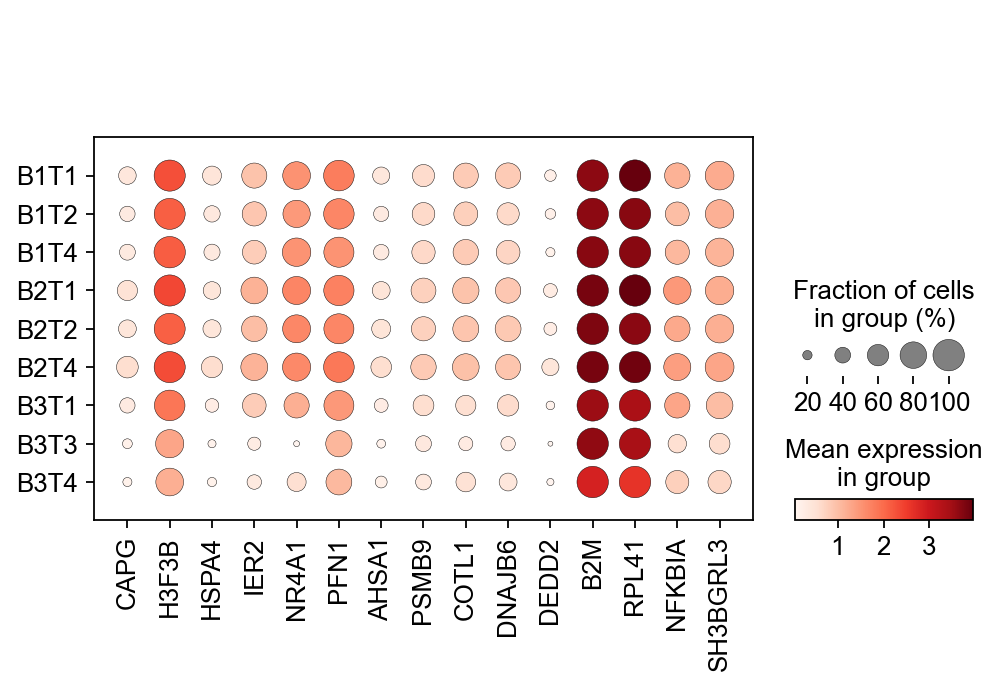

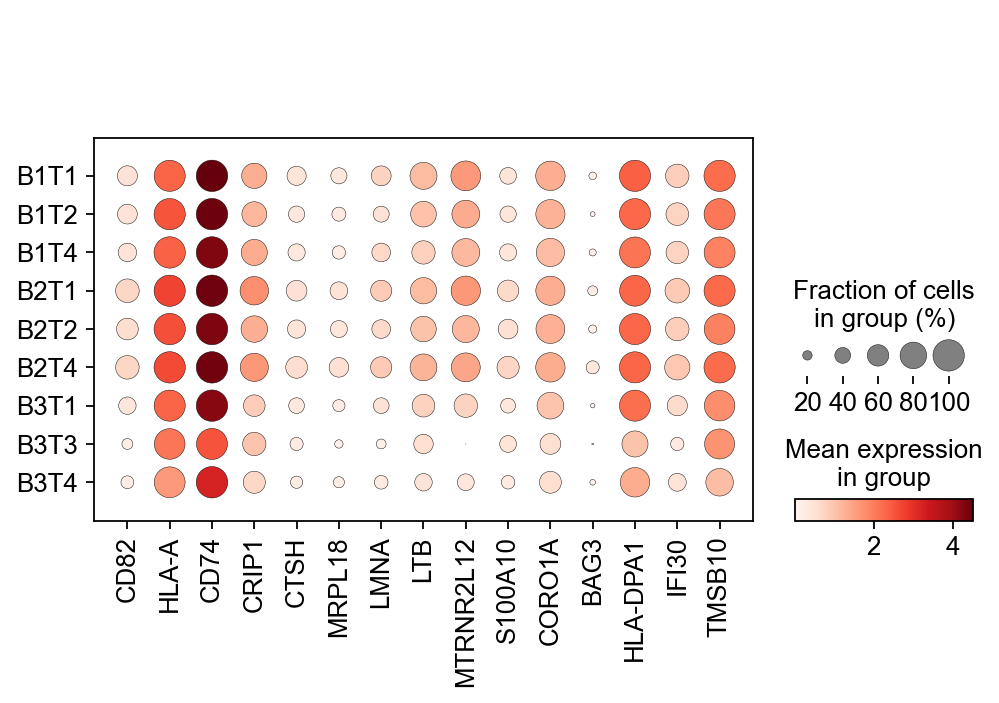

In [52]:
#B2T4
sc.pl.dotplot(adata_F, ["HSP90AA1",	"HSPA1A",	"DNAJB1",	"HSPE1",	"HSPA1B",	"HSPA8",	"HSPD1",	"DNAJA1",	"HSPH1",	"HSP90AB1",	"HLA-C",	"CACYBP",	"ACTB",	"STIP1",	"HSPB1",
], groupby=['B_T_patient_cluster'])
sc.pl.dotplot(adata_F, ["KLF6",	"PTGES3",	"JUN",	"PPP1R15A",	"VIM",	"LSP1",	"UBB",	"ACTG1",	"RAC2",	"RPS26",	"DUSP1",	"IFITM1",	"FKBP4",	"CHORDC1",	"ZFP36",
], groupby=['B_T_patient_cluster'])
sc.pl.dotplot(adata_F, ["CAPG",	"H3F3B",	"HSPA4",	"IER2",	"NR4A1",	"PFN1",	"AHSA1",	"PSMB9",	"COTL1",	"DNAJB6",	"DEDD2",	"B2M",	"RPL41",	"NFKBIA",	"SH3BGRL3",
], groupby=['B_T_patient_cluster'])
sc.pl.dotplot(adata_F, ["CD82",	"HLA-A",	"CD74",	"CRIP1",	"CTSH",	"MRPL18",	"LMNA",	"LTB",	"MTRNR2L12",	"S100A10",	"CORO1A",	"BAG3",	"HLA-DPA1",	"IFI30",	"TMSB10",
], groupby=['B_T_patient_cluster'])

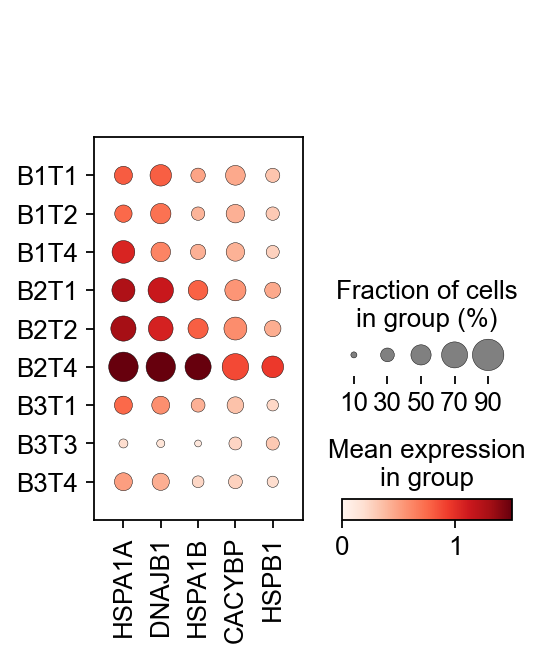

In [55]:
#B2T4
#FABP5,S100A10,VDAC2 : bad prognosis
sc.pl.dotplot(adata_F, ['HSPA1A','DNAJB1','HSPA1B','CACYBP','HSPB1'],vmin=0, vmax=1.5, groupby=['B_T_patient_cluster'])#,save='biomarkers_of_Bcell_F1T4.pdf')


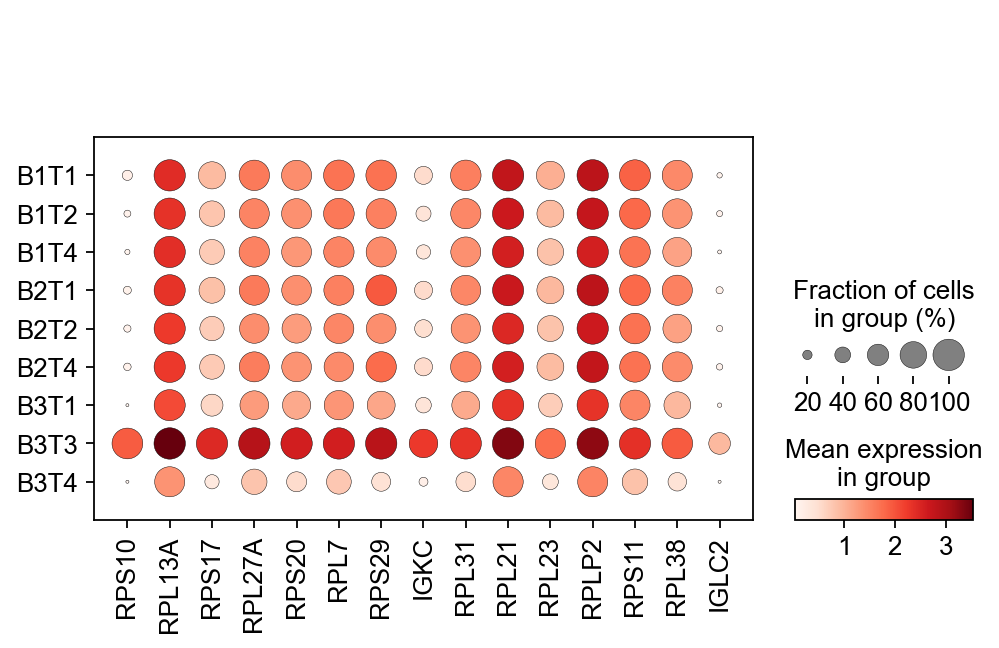

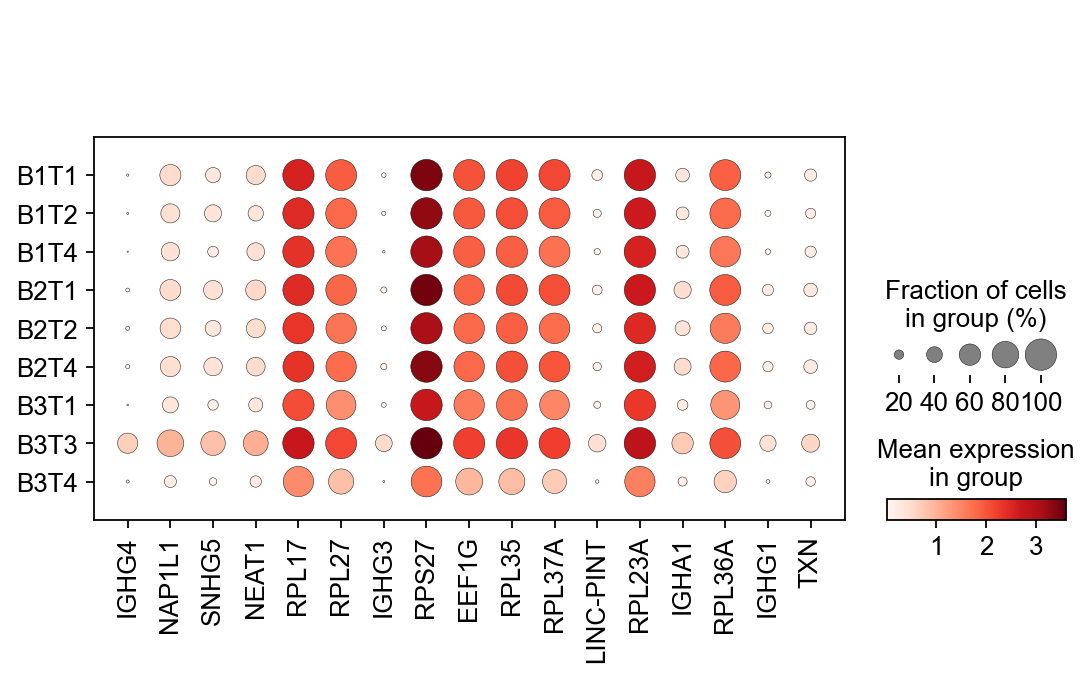

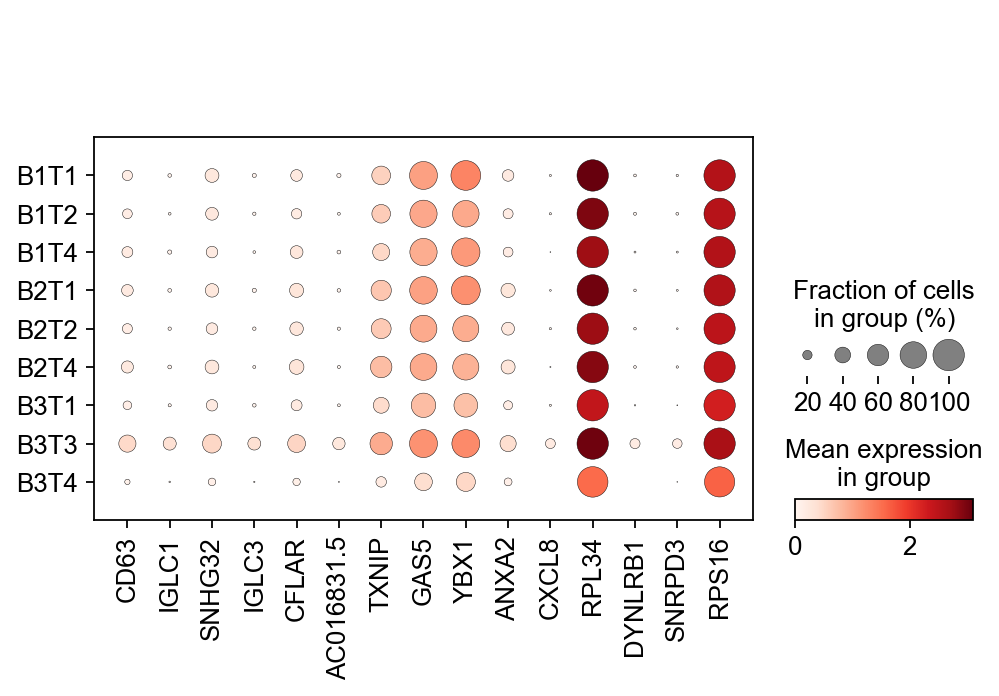

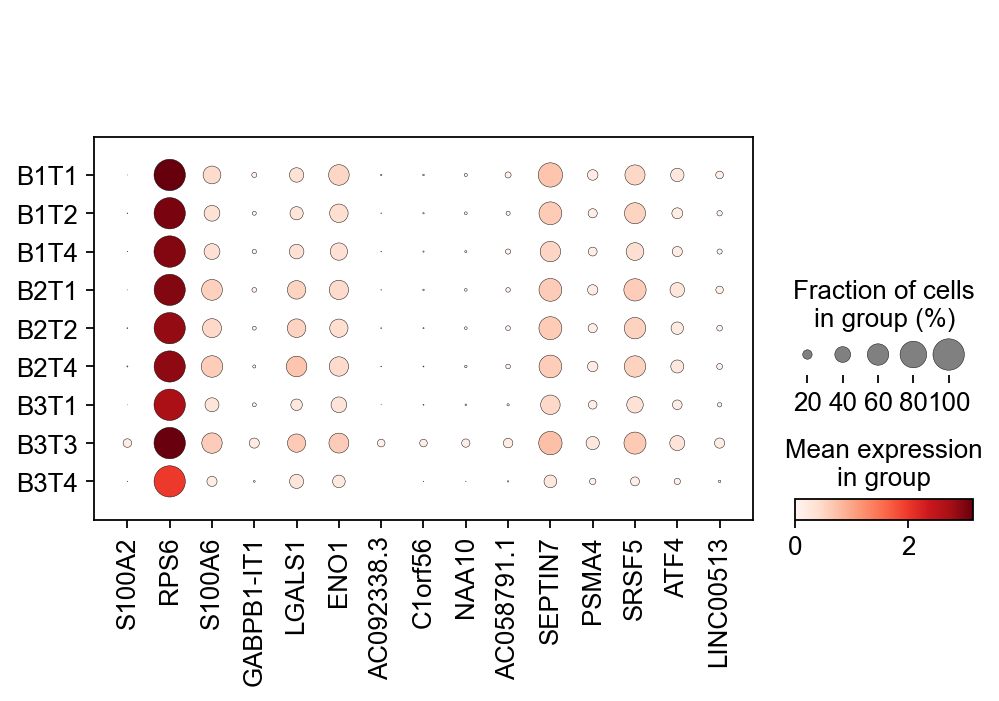

In [56]:
#B3T3
sc.pl.dotplot(adata_F, ["RPS10",	"RPL13A",	"RPS17",	"RPL27A",	"RPS20",	"RPL7",	"RPS29",	"IGKC",	"RPL31",	"RPL21",	"RPL23",	"RPLP2",	"RPS11",	"RPL38",	"IGLC2",
], groupby=['B_T_patient_cluster'])
sc.pl.dotplot(adata_F, ["IGHG4",	"NAP1L1",	"SNHG5",	"NEAT1",	"RPL17",	"RPL27",	"IGHG3",	"RPS27",	"EEF1G",	"RPL35",	"RPL37A",	"LINC-PINT",	"RPL23A",	"IGHA1",	"RPL36A",	"IGHG1",	"TXN",
], groupby=['B_T_patient_cluster'])
sc.pl.dotplot(adata_F, ["CD63",	"IGLC1",	"SNHG32",	"IGLC3",	"CFLAR",	"AC016831.5",	"TXNIP",	"GAS5",	"YBX1",	"ANXA2",	"CXCL8",	"RPL34",	"DYNLRB1",	"SNRPD3",	"RPS16",
], groupby=['B_T_patient_cluster'])
sc.pl.dotplot(adata_F, ["S100A2",	"RPS6",	"S100A6",	"GABPB1-IT1",	"LGALS1",	"ENO1",	"AC092338.3",	"C1orf56",	"NAA10",	"AC058791.1",	"SEPTIN7",	"PSMA4",	"SRSF5",	"ATF4",	"LINC00513",
], groupby=['B_T_patient_cluster'])

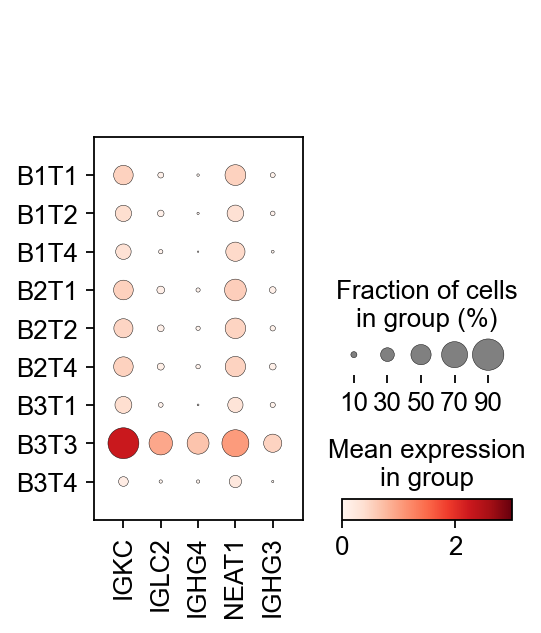

In [58]:
#B3T3
#STK4 good prognosis
sc.pl.dotplot(adata_F, ['IGKC','IGLC2','IGHG4','NEAT1','IGHG3'],vmin=0, vmax=3, groupby=['B_T_patient_cluster'])#,save='biomarkers_of_fibroblast_F4T2.pdf')


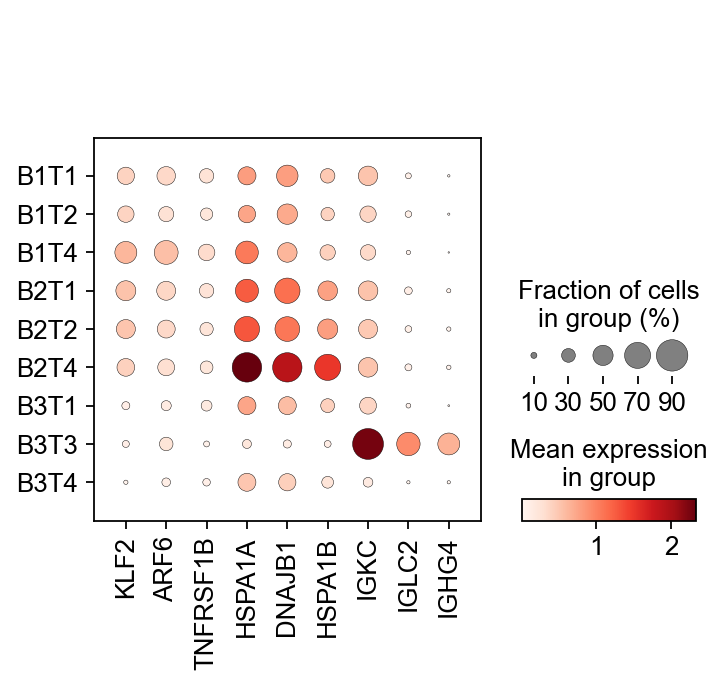

In [61]:
sc.pl.dotplot(adata_F, ["KLF2","ARF6","TNFRSF1B",
                        'HSPA1A','DNAJB1','HSPA1B',
                       'IGKC','IGLC2','IGHG4' 
                       ], groupby=['B_T_patient_cluster'],save='B1T4_B2T4_B3T3_markers_in_B_cell.pdf')


In [68]:
adata_F_sub = adata_F[adata_F.obs['B_T_patient_cluster'].isin(['B2T4','B3T3'])]
adata_F_sub

View of AnnData object with n_obs × n_vars = 4883 × 12499
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'Fibro_patient_cluster', 'Fibro_T_patient_cluster', 'B_T_patient_cluster'
    var: 'gene_ids', 'mt', 'feature_types-10', 'feature_types-11', 'feature_types-12', 'feature_types-13', 'feature_types-14', 'feature_types-15', 'feature_types-16', 'feature_types-17', 'feature_types-18', 'feature_types-19', 'feature_types-20', 'feature_types-21', 'feature_types-3', 'feature_types-4', 'feature_types-5', 'feature_types-6', 'feature_types-7', 'feature_types-8', 'feature_types-9', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_

In [69]:
sc.tl.rank_genes_groups(adata_F_sub, 'B_T_patient_cluster', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [70]:
result_F_sub = adata_F_sub.uns['rank_genes_groups']
groups_F_sub = result_F_sub['names'].dtype.names
pval_table_F_sub = pd.DataFrame(
            {group + '_' + key[:2]: result_F_sub[key][group]
            for group in groups_F_sub for key in ['names', 'pvals_adj']})
pval_table_F_sub

B2T4_na        B2T4_pv   B3T3_na        B3T3_pv
0          CD74   0.000000e+00     RPS10   0.000000e+00
1          ACTB   0.000000e+00     RPS17   0.000000e+00
2      HSP90AA1  4.420811e-286    RPL13A   0.000000e+00
3      HLA-DPA1  6.346444e-277     RPS20  6.747058e-292
4         HSPA8  7.736955e-234    RPL27A  6.703145e-283
...         ...            ...       ...            ...
12494    RPL27A  6.703145e-283     HSPA8  7.736955e-234
12495     RPS20  6.747058e-292  HLA-DPA1  6.346444e-277
12496    RPL13A   0.000000e+00  HSP90AA1  4.420811e-286
12497     RPS17   0.000000e+00      ACTB   0.000000e+00
12498     RPS10   0.000000e+00      CD74   0.000000e+00

[12499 rows x 4 columns]

In [ ]:
# "KLF2","ARF6","TNFRSF1B",
# 'HSPA1A','DNAJB1','HSPA1B',
# 'IGKC','IGLC2','IGHG4' 

In [72]:
pval_table_F_sub.loc[pval_table_F_sub['B2T4_na'].isin(['HSPA1A','DNAJB1','HSPA1B'])]

B2T4_na        B2T4_pv B3T3_na        B3T3_pv
15  HSPA1A  2.770929e-161   IGHG3  3.071926e-153
27  DNAJB1  4.405986e-138   SNHG5   3.258296e-78
58  HSPA1B  2.221445e-104    RPS6   1.851891e-24

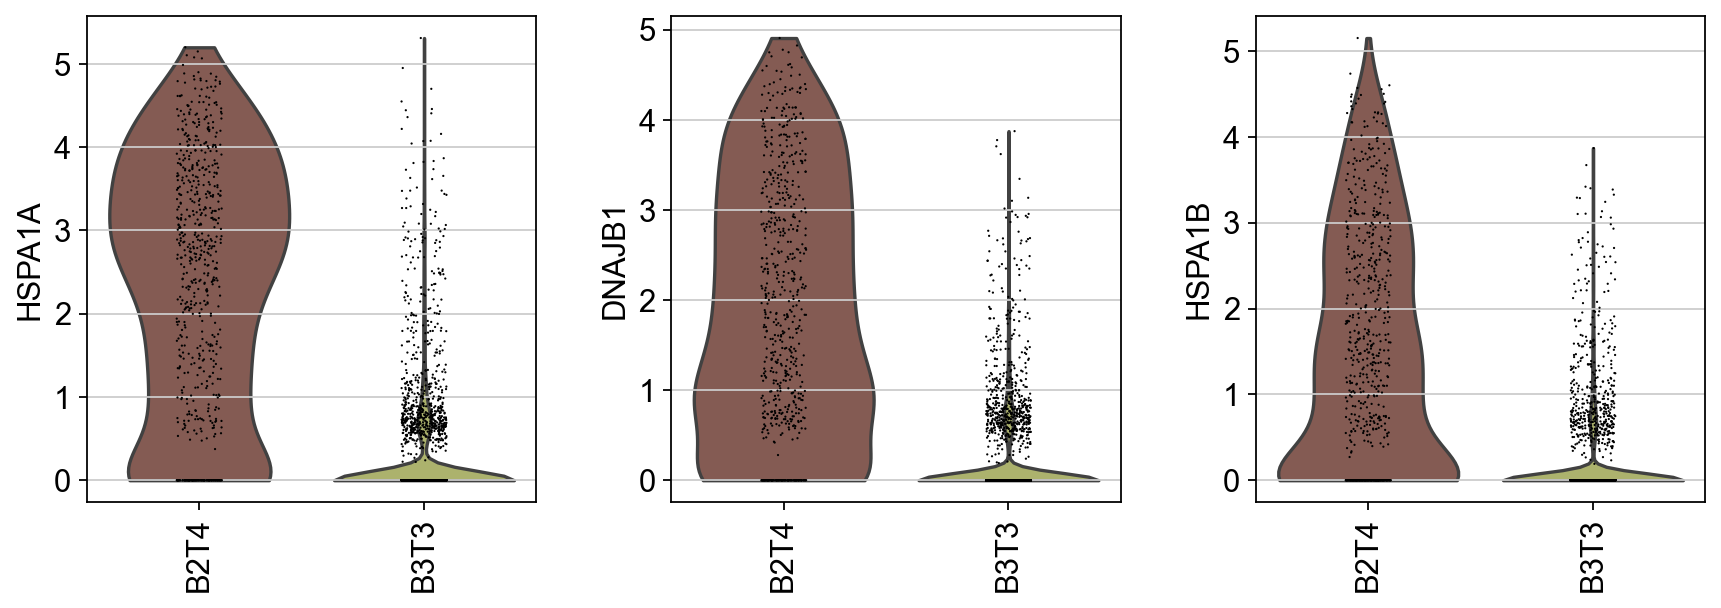

In [73]:
sc.pl.violin(adata_F_sub, keys=['HSPA1A','DNAJB1','HSPA1B'], groupby='B_T_patient_cluster',
    rotation=90, save='_HSPA1A_DNAJB1_HSPA1B_in_B_cell.tif')

In [72]:
pval_table_F_sub.loc[pval_table_F_sub['B2T4_na'].isin([ 'IGKC','IGLC2','IGHG4' ])]

B2T4_na        B2T4_pv B3T3_na        B3T3_pv
15  HSPA1A  2.770929e-161   IGHG3  3.071926e-153
27  DNAJB1  4.405986e-138   SNHG5   3.258296e-78
58  HSPA1B  2.221445e-104    RPS6   1.851891e-24

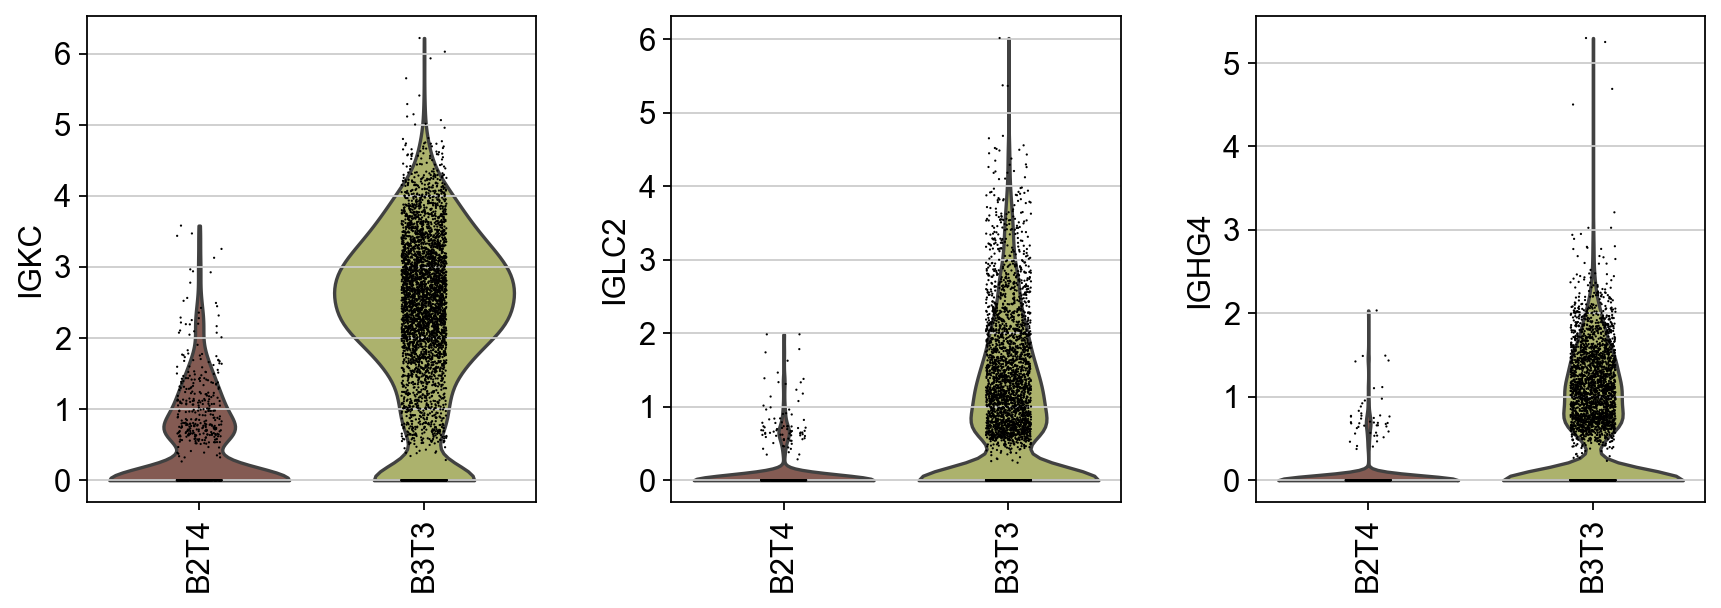

In [74]:
sc.pl.violin(adata_F_sub, keys=[ 'IGKC','IGLC2','IGHG4' ], groupby='B_T_patient_cluster',
    rotation=90, save='_IGKC_IGLC2_IGHG4_in_B_cell.tif')